In [307]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

In [308]:
import sklearn
from sklearn.linear_model import LinearRegression
#rom sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LassoLars

from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [309]:
def get_ranks(good_df,ypred):
    cutoff=0.2
    #print (codedata,ypred,ydata)
    #print (len(ypred),len(good_df.mm.to_list()))
    d = {'code':good_df.code.to_list(),'pred':ypred,
         "dockQ":good_df.dockQ.to_list(),"params":good_df.params.to_list(),
        "mm":good_df.mm.to_list()}
    res_df=pd.DataFrame(d).sort_values("pred")
    #res_df.sort_values("CODE")

    i=0
    sumdiff=0
    mmdiff=0
    correct=0
    for code in res_df.code.unique():
        topranked=res_df.loc[res_df.code==code].sort_values("pred")["dockQ"][-1:].max()
        best=res_df.loc[res_df.code==code]["dockQ"].max()
        mmtop=res_df.loc[res_df.code==code].sort_values("pred")["mm"][-1:].max()
        mmbest=res_df.loc[res_df.code==code]["mm"].max()
        #print (code,topranked,best)
        if best>cutoff:
            i+=1
            sumdiff+=best-topranked
            mmdiff+=mmbest-mmtop
            if topranked>cutoff:
                correct+=1
    #print (i,correct,round(sumdiff/i,3))            
    return (i,correct,sumdiff,mmdiff)

In [310]:
reg = LinearRegression()
#reg=RandomForestClassifier(n_estimators=10)
#reg=LassoLars(alpha=.1)
#reg = TweedieRegressor(power=1, alpha=0.5, link='log')
#reg=TheilSenRegressor(random_state=42)
#reg=RANSACRegressor(random_state=42)
#reg=HuberRegressor()

In [311]:
df=pd.read_csv("~/Downloads/summary.csv",sep=",")
df=df.dropna()

In [312]:
sns.set(style="whitegrid")

In [313]:
df["name"]
df.keys()

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank'],
      dtype='object')

In [314]:

df["code"]=df["name"].str[:4]
df["CODE"]=df["code"]
df["params"]=df["JHparams"]

In [315]:
r=re.compile("^PDB|^pdb|^TMd|gramm")
datasets=df.JHparams.unique()
notRosettaset=list(filter(r.match, datasets))
df2=df.loc[~df.JHparams.isin(notRosettaset)].copy()
df2.JHparams="trRosetta"
df2.params="trRosetta"
df2

name   JHparams  lenA  lenB     msa      msaA      msaB  \
0     1ay7_u1_A-1ay7_u2_A  trRosetta    97    90  1060.0    1485.0    2034.0   
1     1ay7_u2_A-1ay7_u1_A  trRosetta    90    97  1060.0    2034.0    1485.0   
2     1b27_u1_A-1b27_u2_A  trRosetta   109    90   733.0    1484.0    2034.0   
3     1b27_u2_A-1b27_u1_A  trRosetta    90   109   733.0    2034.0    1484.0   
4     1bdj_u1_A-1bdj_u2_A  trRosetta   129   118  5651.0  349880.0   23051.0   
...                   ...        ...   ...   ...     ...       ...       ...   
8806  4y5o_u1_A-4y5o_u2_A  trRosetta    94    85    34.0    3100.0    1781.0   
8807  4zfr_u1_A-4zfr_u2_A  trRosetta   186    77    12.0    9290.0   38386.0   
8808  5brr_u1_A-5brr_u2_A  trRosetta   378   266   107.0   13553.0   45450.0   
8809  5cec_u1_A-5cec_u2_A  trRosetta   403   191     7.0   30621.0  309307.0   
8810  5eg3_u1_A-5eg3_u2_A  trRosetta   303   105     7.0  565997.0   25926.0   

       cdhit  dockQ   fnat  ...  medpdb  longpdb  avprob   auc  evalue  \
0     1026.0  0.298  0.222  ...   178.0    828.0   0.108  0.40  9999.0   
1      989.0  0.239  0.250  ...   188.0    771.0   0.112  0.36  9999.0   
2      654.0  0.223  0.120  ...   187.0    838.0   0.096  0.46     4.3   
3      656.0  0.229  0.160  ...   219.0    922.0   0.099  0.46     4.3   
4     5071.0  0.000  0.000  ...   157.0   1028.0   0.020  0.00  9999.0   
...      ...    ...    ...  ...     ...      ...     ...   ...     ...   
8806    11.0  0.055  0.000  ...    75.0    570.0   0.136  0.00  9999.0   
8807    12.0  0.048  0.000  ...   158.0    615.0   0.160  0.09  9999.0   
8808    79.0  0.009  0.000  ...   332.0   2118.0   0.195  0.00   236.0   
8809     7.0  0.011  0.000  ...   412.0   2031.0   0.220  0.00   197.0   
8810     5.0  0.003  0.000  ...   221.0    893.0   0.149  0.00    68.0   

       seqid  rank  code  CODE     params  
0      0.000   1.0  1ay7  1ay7  trRosetta  
1      0.000   2.0  1ay7  1ay7  trRosetta  
2     50.000   1.0  1b27  1b27  trRosetta  
3     50.000   2.0  1b27  1b27  trRosetta  
4      0.000   1.0  1bdj  1bdj  trRosetta  
...      ...   ...   ...   ...        ...  
8806   0.000   1.0  4y5o  4y5o  trRosetta  
8807   0.000   1.0  4zfr  4zfr  trRosetta  
8808  66.667   1.0  5brr  5brr  trRosetta  
8809  33.333   1.0  5cec  5cec  trRosetta  
8810  40.000   1.0  5eg3  5eg3  trRosetta  

[3536 rows x 45 columns]

In [316]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.JHparams.unique()

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [317]:
r=re.compile("^PDB|^pdb")
datasets=df.JHparams.unique()
pdbset=list(filter(r.match, datasets))
df2=df.loc[(df.JHparams.isin(pdbset))&(~df.JHparams.isin(["pdbconfold"]))].copy()
df2.JHparams="PDB"
df2.params="PDB"
df2

name JHparams  lenA  lenB     msa      msaA  \
5116               1ay7_u1_A-1ay7_u2_A      PDB    97    90  1060.0    1485.0   
5117               1b27_u1_A-1b27_u2_A      PDB   109    90   733.0    1484.0   
5118               1bdj_u1_A-1bdj_u2_A      PDB   129   118  5651.0  349880.0   
5119               1bdj_u2_A-1bdj_u1_A      PDB   118   129  5651.0   23051.0   
5120               1bvn_u1_A-1bvn_u2_A      PDB   496    75    95.0   52623.0   
...                                ...      ...   ...   ...     ...       ...   
7390  4k0v_u1_A-4k0v_u2_A.pdb-starting      PDB   424   218     0.0       0.0   
7391  4rf0_u1_A-4rf0_u2_A.pdb-starting      PDB   320    77     0.0       0.0   
7392     4rf0_u1_A-4rf0_u2_A.pdb-step1      PDB   320    77     0.0       0.0   
7393  4xhu_u1_A-4xhu_u2_A.pdb-starting      PDB   352    95     0.0       0.0   
7394     4xhu_u1_A-4xhu_u2_A.pdb-step1      PDB   352    95     0.0       0.0   

          msaB   cdhit  dockQ   fnat  ...  medpdb  longpdb  avprob   auc  \
5116    2034.0   986.0  0.888  0.861  ...     0.0      0.0     0.0  0.02   
5117    2034.0   654.0  0.813  0.700  ...     0.0      0.0     0.0  0.02   
5118   23051.0  5071.0  0.729  0.765  ...     0.0      0.0     0.0  0.01   
5119  349880.0  5080.0  0.060  0.118  ...     0.0      0.0     0.0  0.07   
5120     123.0    85.0  0.076  0.154  ...     0.0      0.0     0.0  0.05   
...        ...     ...    ...    ...  ...     ...      ...     ...   ...   
7390       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.08   
7391       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.05   
7392       0.0     0.0  0.220  0.556  ...     0.0      0.0     0.0  0.05   
7393       0.0     0.0  0.000  0.000  ...     0.0      0.0     0.0  0.02   
7394       0.0     0.0  0.169  0.444  ...     0.0      0.0     0.0  0.02   

      evalue   seqid  rank  code  CODE  params  
5116  9999.0   0.000   1.0  1ay7  1ay7     PDB  
5117     4.3  50.000   1.0  1b27  1b27     PDB  
5118  9999.0   0.000   1.0  1bdj  1bdj     PDB  
5119  9999.0   0.000   2.0  1bdj  1bdj     PDB  
5120     2.3  31.250   1.0  1bvn  1bvn     PDB  
...      ...     ...   ...   ...   ...     ...  
7390   144.0  42.857   1.0  4k0v  4k0v     PDB  
7391    51.0  60.000   1.0  4rf0  4rf0     PDB  
7392    51.0  60.000   1.0  4rf0  4rf0     PDB  
7393    17.0  22.222   1.0  4xhu  4xhu     PDB  
7394    17.0  22.222   1.0  4xhu  4xhu     PDB  

[2279 rows x 45 columns]

In [318]:
df=pd.concat([df,df2], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [319]:
# Add a linear combination of trRosetta
r=re.compile(".*-N.*") # .*cpu.*
datasets=df.JHparams.unique()
JHsets=list(filter(r.match, datasets))



In [320]:
cutoff=0.1
goodmodels=df.loc[(df.dockQ>cutoff)&(df.JHparams.isin(JHsets))].code.unique()
good_df=df.loc[(df.code.isin(goodmodels))&(df.JHparams.isin(JHsets))] #.reset_index()
df.dockQ.dtypes

dtype('float64')

Text(0.5, 1.0, 'CC 0.388 Good: 0.889 Loss: 0.053 , 0.074 Test: 9')

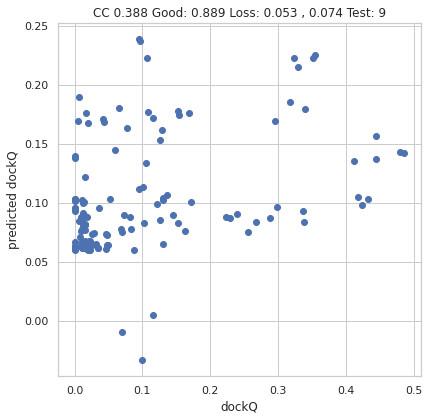

In [321]:
ydata=good_df.dockQ

#cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]
reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [322]:
xdata=df.loc[df.JHparams.isin(JHsets)][cols]
ypred = reg.predict(xdata)
df2=df.loc[df.JHparams.isin(JHsets)].reset_index()
df2.loc[:,'pred'] = ypred
topranked=pd.DataFrame(columns = df2.columns) 


In [323]:

for name in df2.name.unique():
    foo=df2.loc[df2.name==name].sort_values("pred")[-1:].max()
    #print(foo)
    foo_df=pd.DataFrame(foo).transpose()
    #print (foo_df)
    topranked=pd.concat([topranked,foo_df], ignore_index=True)
topranked["JHparams"]="JHranked"
topranked.params="JHranked"
topranked=topranked.drop(["pred","index"],axis=1)
topranked.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [324]:
df.columns

Index(['name', 'JHparams', 'lenA', 'lenB', 'msa', 'msaA', 'msaB', 'cdhit',
       'dockQ', 'fnat', 'iRMS', 'LRMS', 'fnonnat', 'mm', 'tmA', 'tmB', 'long',
       'med', 'longPPV', 'medPPV', 'longA', 'medA', 'longPPVA', 'medPPVA',
       'longB', 'medB', 'longPPVB', 'medPPVB', 'short', 'shortPPV', 'shortA',
       'shortPPVA', 'shortB', 'shortPPVB', 'shortpdb', 'medpdb', 'longpdb',
       'avprob', 'auc', 'evalue', 'seqid', 'rank', 'code', 'CODE', 'params'],
      dtype='object')

In [325]:
df=pd.concat([df,topranked], ignore_index=True,sort=False)
df.fillna(0)
df.params.unique()

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [326]:
df

name      JHparams lenA lenB   msa    msaA    msaB  \
0      1ay7_u1_A-1ay7_u2_A  -N 3 --cpu 8   97   90  1060    1485    2034   
1      1ay7_u2_A-1ay7_u1_A  -N 3 --cpu 8   90   97  1060    2034    1485   
2      1b27_u1_A-1b27_u2_A  -N 3 --cpu 8  109   90   733    1484    2034   
3      1b27_u2_A-1b27_u1_A  -N 3 --cpu 8   90  109   733    2034    1484   
4      1bdj_u1_A-1bdj_u2_A  -N 3 --cpu 8  129  118  5651  349880   23051   
...                    ...           ...  ...  ...   ...     ...     ...   
22931  5cec_u2_A-5cec_u1_A      JHranked  191  403     8   59695     200   
22932  5cra_u1_A-5cra_u2_A      JHranked  193   77     1      11   17793   
22933  5cra_u2_A-5cra_u1_A      JHranked   77  193     1   17793      11   
22934  5eg3_u1_A-5eg3_u2_A      JHranked  303  105   421  565997   25926   
22935  5eg3_u2_A-5eg3_u1_A      JHranked  105  303   305    3955  147816   

      cdhit  dockQ   fnat  ... medpdb longpdb avprob   auc evalue   seqid  \
0      1026  0.298  0.222  ...    178     828  0.108   0.4   9999       0   
1       989  0.239   0.25  ...    188     771  0.112  0.36   9999       0   
2       654  0.223   0.12  ...    187     838  0.096  0.46    4.3      50   
3       656  0.229   0.16  ...    219     922  0.099  0.46    4.3      50   
4      5071      0      0  ...    157    1028   0.02     0   9999       0   
...     ...    ...    ...  ...    ...     ...    ...   ...    ...     ...   
22931     7   0.05  0.075  ...   1039    4734  0.226     0    197  33.333   
22932     1  0.011      0  ...    148     595  0.179     0   9999       0   
22933     1  0.076      0  ...    417    2052  0.181  0.17   9999       0   
22934   205      0      0  ...    221     893  0.049     0     68      40   
22935   102  0.012      0  ...    645    3089  0.098     0     68      40   

      rank  code  CODE        params  
0        1  1ay7  1ay7  -N 3 --cpu 8  
1        2  1ay7  1ay7  -N 3 --cpu 8  
2        1  1b27  1b27  -N 3 --cpu 8  
3        2  1b27  1b27  -N 3 --cpu 8  
4        1  1bdj  1bdj  -N 3 --cpu 8  
...    ...   ...   ...           ...  
22931    2  5cec  5cec      JHranked  
22932    1  5cra  5cra      JHranked  
22933    2  5cra  5cra      JHranked  
22934    1  5eg3  5eg3      JHranked  
22935    2  5eg3  5eg3      JHranked  

[22936 rows x 45 columns]

In [437]:
#df["rank"].str.isnumeric().unique()
#df.dtypes

In [328]:
# We need to check that everything is numeric
cols=['name', 'JHparams', 'seqid',      'rank']

#for d in df.columns.values.tolist():
for d in ["rank","len"]:
    if d=="name": continue
    if d=="JHparams": continue
    print (d)
    #print (df.loc[(df[d].str.isnumeric()!=True)][cols+[d]])
    #print (df.loc[(df[d].str.isnumeric()][d].unique()
    #print (df[d].str.isnumeric().unique())

rank
len


In [329]:
# Divide data into datasets


df["tmAB"]=df[["tmA","tmB"]].mean(axis=1)
df["msaAB"]=df[["msaA","msaB"]].mean(axis=1)
df["tmAB_max"]=df[["tmA","tmB"]].max(axis=1)
df["msaAB_max"]=df[["msaA","msaB"]].max(axis=1)
df["tmAB_min"]=df[["tmA","tmB"]].min(axis=1)
df["msaAB_min"]=df[["msaA","msaB"]].min(axis=1)
df["numcorrect"]=df["longPPV"]*df["long"]
df["len"]=df["lenA"]+df["lenB"]

codes=df.code.unique()
df_mean=df.groupby(["JHparams","code"]).mean()
df_max=df.groupby(["JHparams","code"]).max()
df_min=df.groupby(["JHparams","code"]).min()
df_first=df.loc[df["rank"]==1]

In [330]:
df.columns.values.tolist()

['name',
 'JHparams',
 'lenA',
 'lenB',
 'msa',
 'msaA',
 'msaB',
 'cdhit',
 'dockQ',
 'fnat',
 'iRMS',
 'LRMS',
 'fnonnat',
 'mm',
 'tmA',
 'tmB',
 'long',
 'med',
 'longPPV',
 'medPPV',
 'longA',
 'medA',
 'longPPVA',
 'medPPVA',
 'longB',
 'medB',
 'longPPVB',
 'medPPVB',
 'short',
 'shortPPV',
 'shortA',
 'shortPPVA',
 'shortB',
 'shortPPVB',
 'shortpdb',
 'medpdb',
 'longpdb',
 'avprob',
 'auc',
 'evalue',
 'seqid',
 'rank',
 'code',
 'CODE',
 'params',
 'tmAB',
 'msaAB',
 'tmAB_max',
 'msaAB_max',
 'tmAB_min',
 'msaAB_min',
 'numcorrect',
 'len']

In [331]:
cols=['name', 'JHparams', 'seqid',      'rank']
      
d="TMdock-nohomology"
#df.loc[df.JHparams==d].groupby(["code"])[cols].first()

df.loc[(df.JHparams==d) & ((df["rank"].str.isnumeric()!=True))][cols]
#df.loc[(df.JHparams==d)]["rank"].str.isnumeric()
#df.loc[(df.JHparams==d)] 
      
      

AttributeError: Can only use .str accessor with string values!

In [332]:
datasets=df.JHparams.unique()
data_mean={}
data_max={}
data_min={}
for d in datasets:
    print (d)
    data_mean[d]=df.loc[df.JHparams==d].groupby(["code"]).mean()
    data_max[d]=df.loc[df.JHparams==d].groupby(["code"]).max()
    data_min[d]=df.loc[df.JHparams==d].groupby(["code"]).min()


-N 3 --cpu 8


gramm


homodimer


ispred


-N 1 -E 1.e-100 --cpu 8


-N 1 -E 1.e-2 


N1-merged-pdb


N1-merged


-N 1 -E 1.e-10 --cpu 8 


N1-top1000-merged


N1-top1000


N1-top100


N1-top2000


N1-top500


N3dock


-N 3 --incE 1.e-2


N3-merged


N3-multimerged


N3-newdockA


N3-newdockB


N3-newdockC


N5-newdockA


N5-newdockB


N5-newdockC


pdbcontacts


PDBDOCK2


PDBDOCK3


PDBDOCK4


PDBDOCK


PDBNEWDOCK-standard


PDBNEWDOCK-standard--starting


PDBNEWDOCK-standard--step1


pdbnewcontacts


PDBNEWDOCK-A--dockB1


PDBNEWDOCK-A--dockB2


PDBNEWDOCK-A--dockB-relax


PDBNEWDOCK-A--dockC1


PDBNEWDOCK-A--dockC2


PDBNEWDOCK-A--dockC-relax


PDBNEWDOCK-A--dockD1


PDBNEWDOCK-A--dockD2


PDBNEWDOCK-A--dockD-relax


PDBNEWDOCK-A--starting


PDBNEWDOCK-A--step1


PDBNEWDOCK-B--dockB1


PDBNEWDOCK-B--dockB2


PDBNEWDOCK-B--dockB-relax


PDBNEWDOCK-B--dockC1


PDBNEWDOCK-B--dockC2


PDBNEWDOCK-B--dockC-relax


PDBNEWDOCK-B--dockD1


PDBNEWDOCK-B--dockD2


PDBNEWDOCK-B--dockD-relax


PDBNEWDOCK-B--starting


PDBNEWDOCK-B--step1


PDBNEWDOCK-C--dockB1


PDBNEWDOCK-C--dockB2


PDBNEWDOCK-C--dockB-relax


PDBNEWDOCK-C--dockC1


PDBNEWDOCK-C--dockC2


PDBNEWDOCK-C--dockC-relax


PDBNEWDOCK-C--dockD1


PDBNEWDOCK-C--dockD2


PDBNEWDOCK-C--dockD-relax


PDBNEWDOCK-C--starting


PDBNEWDOCK-C--step1


PDBNEWDOCK-D--dockB1


PDBNEWDOCK-D--dockB2


PDBNEWDOCK-D--dockB-relax


PDBNEWDOCK-D--dockC1


PDBNEWDOCK-D--dockC2


PDBNEWDOCK-D--dockC-relax


PDBNEWDOCK-D--dockD1


PDBNEWDOCK-D--dockD2


PDBNEWDOCK-D--dockD-relax


PDBNEWDOCK-D--starting


PDBNEWDOCK-D--step1


PDBNEWDOCK-repulsion--starting


PDBNEWDOCK-repulsion--step1


rbh-jh


rbh-merged-pdb


rbh-merged
rbh


TMdock-nohomology-1.e-5


TMdock-double


TMdock-nohomology


TMdock


trRosetta


PDB


JHranked


In [333]:
df.loc[ (df.JHparams=="trRosetta")  & (df["rank"]==1)]

name   JHparams lenA lenB   msa    msaA    msaB cdhit  \
16685  1ay7_u1_A-1ay7_u2_A  trRosetta   97   90  1060    1485    2034  1026   
16687  1b27_u1_A-1b27_u2_A  trRosetta  109   90   733    1484    2034   654   
16689  1bdj_u1_A-1bdj_u2_A  trRosetta  129  118  5651  349880   23051  5071   
16691  1buh_u1_A-1buh_u2_A  trRosetta  291   72  1177  555226    1820   548   
16693  1bvn_u1_A-1bvn_u2_A  trRosetta  496   75    95   52623     123    85   
...                    ...        ...  ...  ...   ...     ...     ...   ...   
20216  4y5o_u1_A-4y5o_u2_A  trRosetta   94   85    34    3100    1781    11   
20217  4zfr_u1_A-4zfr_u2_A  trRosetta  186   77    12    9290   38386    12   
20218  5brr_u1_A-5brr_u2_A  trRosetta  378  266   107   13553   45450    79   
20219  5cec_u1_A-5cec_u2_A  trRosetta  403  191     7   30621  309307     7   
20220  5eg3_u1_A-5eg3_u2_A  trRosetta  303  105     7  565997   25926     5   

       dockQ   fnat  ...  CODE     params      tmAB     msaAB tmAB_max  \
16685  0.298  0.222  ...  1ay7  trRosetta  0.828190    1759.5  0.84625   
16687  0.223   0.12  ...  1b27  trRosetta  0.824750    1759.0  0.85428   
16689      0      0  ...  1bdj  trRosetta  0.861435  186465.5  0.92240   
16691      0      0  ...  1buh  trRosetta  0.560760  278523.0  0.73259   
16693  0.006      0  ...  1bvn  trRosetta  0.619740   26373.0  0.70905   
...      ...    ...  ...   ...        ...       ...       ...      ...   
20216  0.055      0  ...  4y5o  trRosetta  0.568465    2440.5  0.71099   
20217  0.048      0  ...  4zfr  trRosetta  0.505235   23838.0  0.64391   
20218  0.009      0  ...  5brr  trRosetta  0.332210   29501.5  0.38444   
20219  0.011      0  ...  5cec  trRosetta  0.508770  169964.0  0.70983   
20220  0.003      0  ...  5eg3  trRosetta  0.358330  295961.5  0.41599   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
16685    2034.0  0.81013    1485.0     53.985  187  
16687    2034.0  0.79522    1484.0     49.025  199  
16689  349880.0  0.80047   23051.0          0  247  
16691  555226.0  0.38893    1820.0          0  363  
16693   52623.0  0.53043     123.0          0  571  
...         ...      ...       ...        ...  ...  
20216    3100.0  0.42594    1781.0          0  179  
20217   38386.0  0.36656    9290.0          3  263  
20218   45450.0  0.27998   13553.0        468  644  
20219  309307.0  0.30771   30621.0      2.006  594  
20220  565997.0  0.30067   25926.0          0  408  

[2058 rows x 53 columns]

In [334]:
df.JHparams.unique()

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [335]:
data_first={}
data_second={}
for d in datasets:
    data_first[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==1)]
    data_second[d]=df.loc[ (df["JHparams"]==d)  & (df["rank"]==2)]
data_first[datasets[1]]

Empty DataFrame
Columns: [name, JHparams, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, auc, evalue, seqid, rank, code, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len]
Index: []

[0 rows x 53 columns]

In [336]:
datasets


array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [337]:
df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
df_max

name  lenA  lenB     msa  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97     2.0   
                        1b27  1b27_u2_A-1b27_u1_A   109   109    35.0   
                        1bdj  1bdj_u2_A-1bdj_u1_A   129   129   201.0   
                        1buh  1buh_u2_A-1buh_u1_A   291   291   899.0   
                        1bvn  1bvn_u2_A-1bvn_u1_A   496   496     7.0   
...                                           ...   ...   ...     ...   
trRosetta               4zfr  4zfr_u2_A-4zfr_u1_A   186   186  1358.0   
                        5brr  5brr_u2_A-5brr_u1_A   378   378   611.0   
                        5cec  5cec_u2_A-5cec_u1_A   403   403  1594.0   
                        5cra  5cra_u2_A-5cra_u1_A   193   193     1.0   
                        5eg3  5eg3_u2_A-5eg3_u1_A   303   303   421.0   

                                  msaA      msaB   cdhit  dockQ   fnat  \
JHparams                code                                             
-N 1 -E 1.e-10 --cpu 8  1ay7     960.0     960.0     2.0  0.023  0.000   
                        1b27     272.0     272.0    34.0  0.019  0.000   
                        1bdj   29395.0   29395.0   124.0  0.024  0.000   
                        1buh  255874.0  255874.0   401.0  0.061  0.000   
                        1bvn    2041.0    2041.0     7.0  0.038  0.000   
...                                ...       ...     ...    ...    ...   
trRosetta               4zfr   38386.0   38386.0   504.0  0.048  0.000   
                        5brr   45450.0   45970.0   550.0  0.035  0.073   
                        5cec  309307.0  311914.0  1577.0  0.050  0.075   
                        5cra   38383.0   38383.0     1.0  0.076  0.000   
                        5eg3  565997.0  565997.0   205.0  0.016  0.000   

                                 iRMS  ...  CODE                   params  \
JHparams                code           ...                                  
-N 1 -E 1.e-10 --cpu 8  1ay7   15.615  ...  1ay7  -N 1 -E 1.e-10 --cpu 8    
                        1b27   99.396  ...  1b27  -N 1 -E 1.e-10 --cpu 8    
                        1bdj   17.785  ...  1bdj  -N 1 -E 1.e-10 --cpu 8    
                        1buh  491.316  ...  1buh  -N 1 -E 1.e-10 --cpu 8    
                        1bvn   19.311  ...  1bvn  -N 1 -E 1.e-10 --cpu 8    
...                               ...  ...   ...                      ...   
trRosetta               4zfr  291.376  ...  4zfr                trRosetta   
                        5brr  642.702  ...  5brr                trRosetta   
                        5cec  732.223  ...  5cec                trRosetta   
                        5cra   22.323  ...  5cra                trRosetta   
                        5eg3  535.411  ...  5eg3                trRosetta   

                                  tmAB     msaAB  tmAB_max  msaAB_max  \
JHparams                code                                            
-N 1 -E 1.e-10 --cpu 8  1ay7  0.468725     503.0   0.56969      960.0   
                        1b27  0.662735     158.0   0.66638      272.0   
                        1bdj  0.824210   14815.0   0.84941    29395.0   
                        1buh  0.650535  128775.0   0.72158   255874.0   
                        1bvn  0.313205    1023.5   0.33372     2041.0   
...                                ...       ...       ...        ...   
trRosetta               4zfr  0.862735   23838.0   0.90969    38386.0   
                        5brr  0.848585   29785.0   0.97832    45970.0   
                        5cec  0.772850  171412.5   0.84687   311914.0   
                        5cra  0.684675   19197.0   0.91652    38383.0   
                        5eg3  0.833605  295961.5   0.86145   565997.0   

                              tmAB_min  msaAB_min  numcorrect  len  
JHparams                code                                        
-N 1 -E 1.e-10 --cpu 8  1ay7   0.36776    

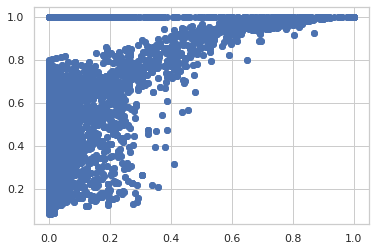

In [338]:

plt.scatter(df.dockQ,df.mm)


Text(0, 0.5, 'TM trRosetta')

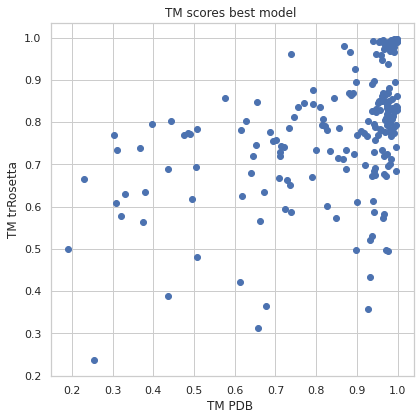

In [339]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
df_merged = pd.merge(data_max["PDB"],data_max["trRosetta"], on=['code'],how="inner")
plt.scatter(df_merged.tmAB_x,df_merged.tmAB_y,label=d)
ax.set_title("TM scores best model ")
ax.set_xlabel("TM PDB ")
ax.set_ylabel("TM trRosetta")



Text(0, 0.5, 'dockQ')

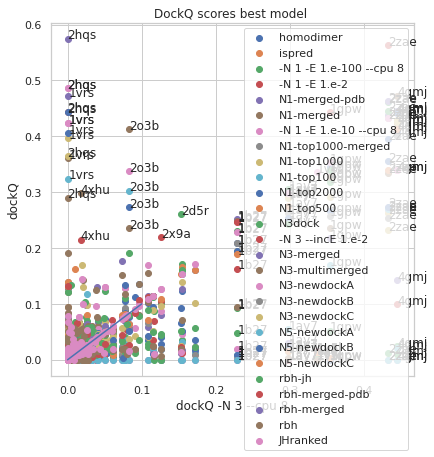

In [340]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    if d=="trRosetta":continue   
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4] # +d
        except:
            sstr=df_merged.name_y[i][0:4] #+d
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.1]
y=[0,0.1]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores best model ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'numcorrect')

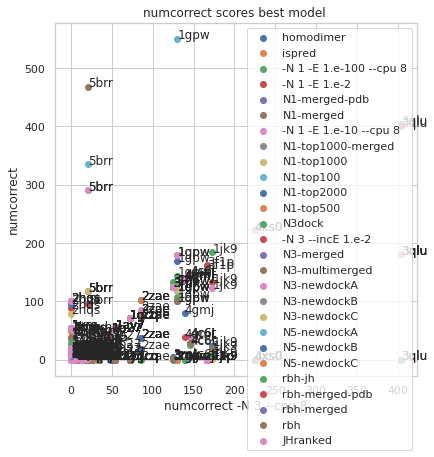

In [341]:
cutoff=5
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue 
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   

    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.numcorrect_x,df_merged.numcorrect_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.numcorrect_x[i]> cutoff or df_merged.numcorrect_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.numcorrect_x[i], df_merged.numcorrect_y[i]))
x=[0,50]
y=[0,50]
plt.plot(x,y)
ax.legend()
ax.set_title("numcorrect scores best model ")
ax.set_xlabel("numcorrect "+str(datasets[0]))
ax.set_ylabel("numcorrect")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

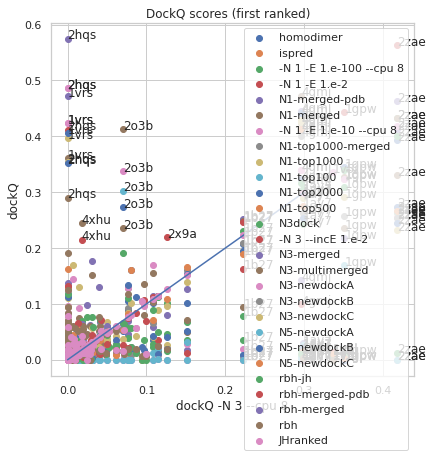

In [342]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="confold":continue   
    #if d=="rbh-merged-pdb":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

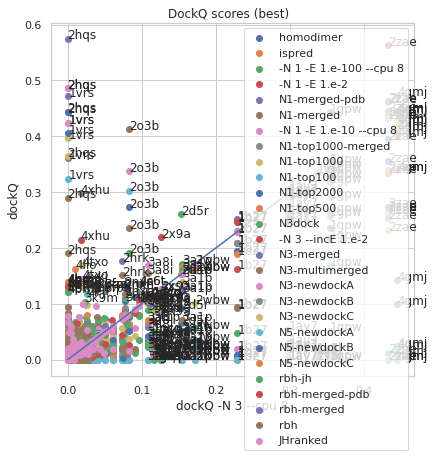

In [343]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in datasets:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.3]
y=[0,0.3]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

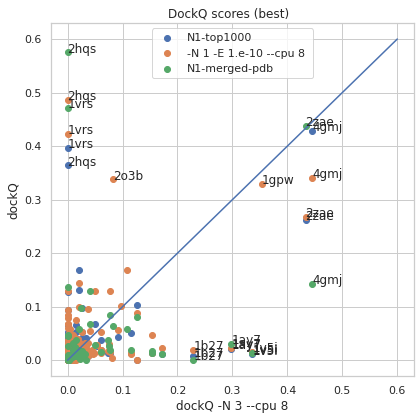

In [344]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["N1-top1000","-N 1 -E 1.e-10 --cpu 8 ","N1-merged-pdb"]:
    if d == datasets[0]: continue
    if d=="gramm":continue   
    if d=="trRosetta":continue   
    if d=="rbh merge pdb ":continue   
    if d[0:3]=="PDB":continue   
    if d[0:3]=="pdb":continue   
    if d[0:3]=="TMd":continue   
        
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max[datasets[0]],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.6]
y=[0,0.6]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [345]:
data_max.keys()

dict_keys(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred', '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb', 'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged', 'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock', '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB', 'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-

Text(0, 0.5, 'dockQ trRosetta')

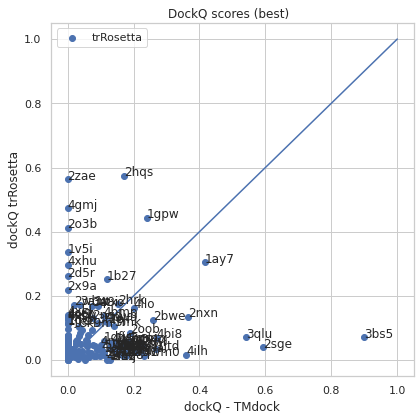

In [346]:
cutoff=0.1
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-double"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - TMdock")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ trRosetta')

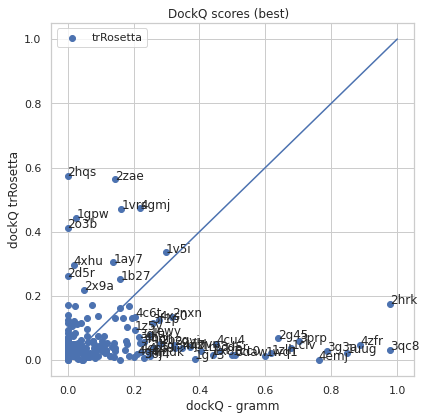

In [347]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (best)  ")
ax.set_xlabel("dockQ - gramm")
ax.set_ylabel("dockQ "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [348]:
d="TMdock"
foo=pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
data_first[d].dockQ
foo[["dockQ_x","dockQ_y"]]
#cc=np.corrcoef(foo.dockQ_x,foo.dockQ_y)

foo.dockQ_y.isna().unique()
data_first[d].dockQ.isna().unique()

array([], dtype=bool)

TMdock
0 0


Text(20.200000000000003, 0.5, 'dockQ TMdock')

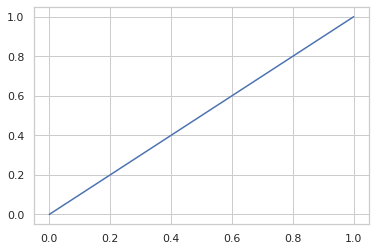

In [349]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock"]:
    #if d!="N1-merged":continue   
    print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    print(df_merged.dockQ_x.shape[0],df_merged.dockQ_y.shape[0])
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_x)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model) ") #, CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(20.200000000000003, 0.5, 'dockQ TMdock-nohomology')

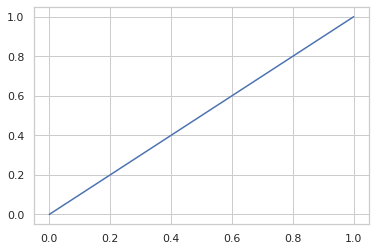

In [350]:
cutoff=0.1
#f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-nohomology"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    #sns.jointplot(x="dockQ_x", y="dockQ_y", data=df_merged)
    #cc=np.corrcoef(df_merged.dockQ_y,df_merged.dockQ_y)
    #print (cc)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,1.0]
y=[0,1.0]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock-nohomology")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock')

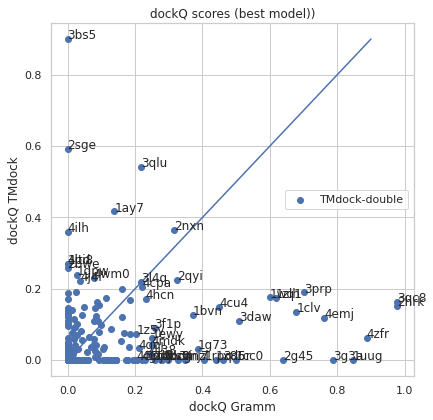

In [351]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model))" )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ')

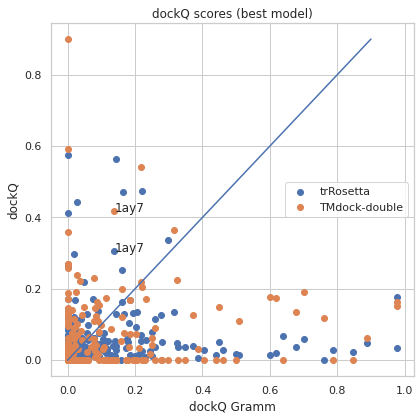

In [352]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta","TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["gramm"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (sstr=="3qc8" or sstr=="2hqs" or sstr=="3bs5" ):
        if (sstr=="1ay7" ):
            #if (df_merged.dockQ_y[i]> cutoff and (df_merged.dockQ_y[i]>df_merged.dockQ_x[i])):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model)") 
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [353]:
df_merged = df_max[df_max["params"].isin(["trRosetta","gramm","TMdock-double"])]
df_merged.sort_values("dockQ")

name  lenA  lenB  msa  msaA  msaB  cdhit  \
JHparams      code                                                            
gramm         3cu1  3cu1_u1_A-3cu1_u2_A   132   101  0.0   0.0   0.0  0.038   
TMdock-double 3w31  3w31_u1_A-3w31_u2_A   193   150  0.0   0.0   0.0  0.007   
              3wkt  3wkt_u1_A-3wkt_u2_A   604   215  0.0   0.0   0.0  0.010   
gramm         4ilh  4ilh_u1_A-4ilh_u2_A   301   256  0.0   0.0   0.0  0.010   
TMdock-double 4bbn  4bbn_u1_A-4bbn_u2_A   379    77  0.0   0.0   0.0  0.066   
...                                 ...   ...   ...  ...   ...   ...    ...   
gramm         1uug  1uug_u1_A-1uug_u2_A   230    83  0.0   0.0   0.0  0.656   
              4zfr  4zfr_u1_A-4zfr_u2_A   186    77  0.0   0.0   0.0  0.695   
TMdock-double 3bs5  3bs5_u1_A-3bs5_u2_A    84    76  0.0   0.0   0.0  0.628   
gramm         3qc8  3qc8_u1_A-3qc8_u2_A   169    82  0.0   0.0   0.0  0.857   
              2hrk  2hrk_u1_A-2hrk_u2_A   181   121  0.0   0.0   0.0  0.696   

                    dockQ     fnat     iRMS  ...  CODE         params  \
JHparams      code                           ...                        
gramm         3cu1  0.000   13.706   30.130  ...  3cu1          gramm   
TMdock-double 3w31  0.000   54.147  122.048  ...  3w31  TMdock-double   
              3wkt  0.000  112.153  231.891  ...  3wkt  TMdock-double   
gramm         4ilh  0.000   38.956   61.357  ...  4ilh          gramm   
TMdock-double 4bbn  0.000   67.897  159.396  ...  4bbn  TMdock-double   
...                   ...      ...      ...  ...   ...            ...   
gramm         1uug  0.847    3.542    6.927  ...  1uug          gramm   
              4zfr  0.887    9.940   19.304  ...  4zfr          gramm   
TMdock-double 3bs5  0.900   16.293   61.530  ...  3bs5  TMdock-double   
gramm         3qc8  0.977   11.047   18.799  ...  3qc8          gramm   
              2hrk  0.978   13.721   37.969  ...  2hrk          gramm   

                         tmAB  msaAB   tmAB_max  msaAB_max  tmAB_min  \
JHparams      code                                                     
gramm         3cu1    0.50000    0.0    1.00000        0.0       0.0   
TMdock-double 3w31   20.00000    0.0   39.00000        0.0       1.0   
              3wkt    8.50000    0.0   16.00000        0.0       1.0   
gramm         4ilh    0.16527    0.0    0.33054        0.0       0.0   
TMdock-double 4bbn    0.50000    0.0    1.00000        0.0       0.0   
...                       ...    ...        ...        ...       ...   
gramm         1uug    5.00000    0.0    9.00000        0.0       1.0   
              4zfr    0.50000    0.0    1.00000        0.0       0.0   
TMdock-double 3bs5  206.50000    0.0  412.00000        0.0       1.0   
gramm         3qc8    0.50000    0.0    1.00000        0.0       0.0   
              2hrk   61.50000    0.0  122.00000        0.0       1.0   

                    msaAB_min  numcorrect  len  
JHparams      code                              
gramm         3cu1        0.0       0.000  233  
TMdock-double 3w31        0.0       0.000  343  
              3wkt        0.0       0.000  819  
gramm         4ilh        0.0       0.000  557  
TMdock-double 4bbn        0.0       0.000  456  
...                       ...         ...  ...  
gramm         1uug        0.0       0.000  313  
              4zfr        0.0       0.000  263  
TMdock-double 3bs5        0.0       0.986  160  
gramm         3qc8        0.0       0.000  251  
              2hrk        0.0       0.000  302  

[652 rows x 51 columns]

In [354]:
len(df_merged.loc[df_merged.dockQ>0.2]["CODE"].unique())

58

In [355]:
len(df_merged.loc[(df_merged.params=="trRosetta")&(df_merged.dockQ>0.2 )]["CODE"].unique())

12

In [356]:
len(df_merged.loc[(df_merged.params=="gramm")&(df_merged.dockQ>0.2 )]["CODE"].unique())

40

In [357]:
len(df_merged.loc[(df_merged.params=="TMdock-double")&(df_merged.dockQ>0.2 )]["CODE"].unique())

15

In [358]:
len(df_merged["CODE"].unique())

218

In [359]:
df.loc[df.params=="TMdock-double"].sort_values("dockQ")

name       JHparams lenA lenB msa msaA msaB  cdhit  \
12334  5eg3_u1_A-5eg3_u2_A  TMdock-double  303  105   0    0    0  0.014   
11500  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.016   
11499  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.026   
11498  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.016   
11497  3ona_u1_A-3ona_u2_A  TMdock-double  161   78   0    0    0  0.026   
...                    ...            ...  ...  ...  ..  ...  ...    ...   
11584  3qlu_u1_A-3qlu_u2_A  TMdock-double  384  374   0    0    0  0.398   
11060  2sge_u1_A-2sge_u2_A  TMdock-double  186   57   0    0    0  0.364   
11215  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0   0.56   
11224  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0  0.628   
11219  3bs5_u1_A-3bs5_u2_A  TMdock-double   84   76   0    0    0  0.539   

       dockQ    fnat  ...  CODE         params    tmAB msaAB tmAB_max  \
12334      0  19.742  ...  5eg3  TMdock-double     0.5   0.0      1.0   
11500      0   18.45  ...  3ona  TMdock-double    13.0   0.0     25.0   
11499      0  13.859  ...  3ona  TMdock-double    13.0   0.0     25.0   
11498      0  18.312  ...  3ona  TMdock-double    13.0   0.0     25.0   
11497      0  13.966  ...  3ona  TMdock-double    13.0   0.0     25.0   
...      ...     ...  ...   ...            ...     ...   ...      ...   
11584  0.542   3.667  ...  3qlu  TMdock-double  3961.5   0.0   7922.0   
11060  0.593   3.624  ...  2sge  TMdock-double     1.0   0.0      1.0   
11215    0.7   2.688  ...  3bs5  TMdock-double   206.5   0.0    412.0   
11224  0.833   2.384  ...  3bs5  TMdock-double   206.5   0.0    412.0   
11219    0.9   2.876  ...  3bs5  TMdock-double   206.5   0.0    412.0   

      msaAB_max tmAB_min msaAB_min numcorrect  len  
12334       0.0      0.0       0.0          0  408  
11500       0.0      1.0       0.0          0  239  
11499       0.0      1.0       0.0          0  239  
11498       0.0      1.0       0.0          0  239  
11497       0.0      1.0       0.0          0  239  
...         ...      ...       ...        ...  ...  
11584       0.0      1.0       0.0     31.752  758  
11060       0.0      1.0       0.0          0  243  
11215       0.0      1.0       0.0      0.986  160  
11224       0.0      1.0       0.0      0.986  160  
11219       0.0      1.0       0.0      0.986  160  

[2160 rows x 53 columns]

In [360]:
df_merged.groupby(["CODE"]).median().sort_values("dockQ")


lenA   lenB     msa     msaA     msaB     cdhit   dockQ     fnat  \
CODE                                                                      
5eg3  303.0  105.0     0.0      0.0      0.0    0.0340  0.0000  22.4970   
4rws  434.0   72.0     0.0      0.0      0.0    0.0210  0.0000  20.0720   
2a9k  212.0  169.0     0.0      0.0      0.0    0.0610  0.0000  21.8880   
1lb2  210.0   82.0     0.0      0.0      0.0    0.0190  0.0000  19.8440   
4f7g  207.0  175.0     0.0      0.0      0.0    0.0120  0.0000  20.1950   
...     ...    ...     ...      ...      ...       ...     ...      ...   
1gpw  252.0  204.0     0.0      0.0      0.0    0.0950  0.2400  19.3830   
1v5i  276.0   78.0     0.0      0.0      0.0    0.2810  0.2980  16.4660   
1ay7   97.0   90.0     0.0      0.0      0.0    0.4340  0.3050  12.2940   
2nxn  255.0  148.0     0.0      0.0      0.0    0.1360  0.3170  14.4160   
1vrs  124.0  120.5  1045.5  50159.5  50159.5  989.0375  0.3175   9.2385   

          iRMS      LRMS  ...       seqid  rank       tmAB    msaAB  \
CODE                      ...                                         
5eg3   93.4620    1.0000  ...      40.000   0.0   0.500000      0.0   
4rws   49.9170    1.0000  ...      33.333   0.0   0.500000      0.0   
2a9k   76.0000    1.0000  ...      66.667   0.0   0.500000      0.0   
1lb2  165.2820    1.0000  ...      26.667   0.0   0.500000      0.0   
4f7g  198.1370    1.0000  ...      33.333   0.0   0.500000      0.0   
...        ...       ...  ...         ...   ...        ...      ...   
1gpw   95.5430    1.0000  ...      66.667   0.0  60.000000      0.0   
1v5i   69.6880    1.0000  ...      10.000   0.0   1.500000      0.0   
1ay7   72.0320    1.0000  ...      10.000   0.0  31.000000      0.0   
2nxn  200.1340    1.0000  ...      10.000   0.0  17.000000      0.0   
1vrs  130.8735  229.6605  ...  168172.231   1.0   0.567912  25780.5   

        tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect    len  
CODE                                                                 
5eg3    1.000000        0.0   0.00000        0.0       0.000  408.0  
4rws    1.000000        0.0   0.00000        0.0       0.000  506.0  
2a9k    0.826320        0.0   0.00000        0.0       0.000  381.0  
1lb2    1.000000        0.0   0.00000        0.0       0.000  292.0  
4f7g    1.000000        0.0   0.00000        0.0       0.000  382.0  
...          ...        ...       ...        ...         ...    ...  
1gpw  119.000000        0.0   1.00000        0.0       2.000  456.0  
1v5i    2.000000        0.0   1.00000        0.0       0.000  354.0  
1ay7   61.000000        0.0   1.00000        0.0       2.001  187.0  
2nxn   33.000000        0.0   1.00000        0.0       0.000  403.0  
1vrs    0.642455    50159.5   0.49337     1401.5      26.994  241.0  

[218 rows x 48 columns]

Text(0, 0.5, 'dockQ TMdock')

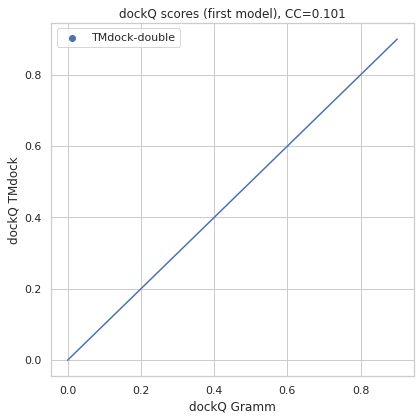

In [361]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first["gramm"],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (first model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ Gramm")
ax.set_ylabel("dockQ TMdock")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock TMdock-double')

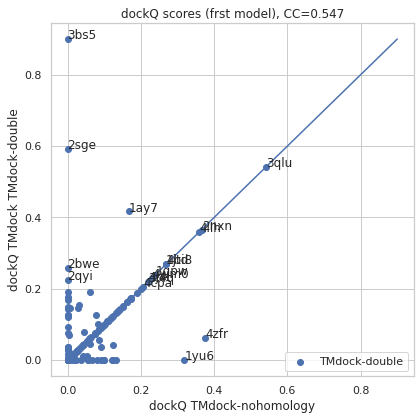

In [362]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["TMdock-double"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock-nohomology"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock-nohomology")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ TMdock trRosetta')

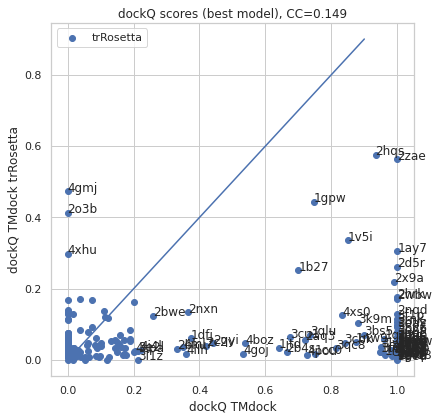

In [363]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in ["trRosetta"]:
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_max["TMdock"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (best model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ TMdock")
ax.set_ylabel("dockQ TMdock "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0, 0.5, 'dockQ  PDB')

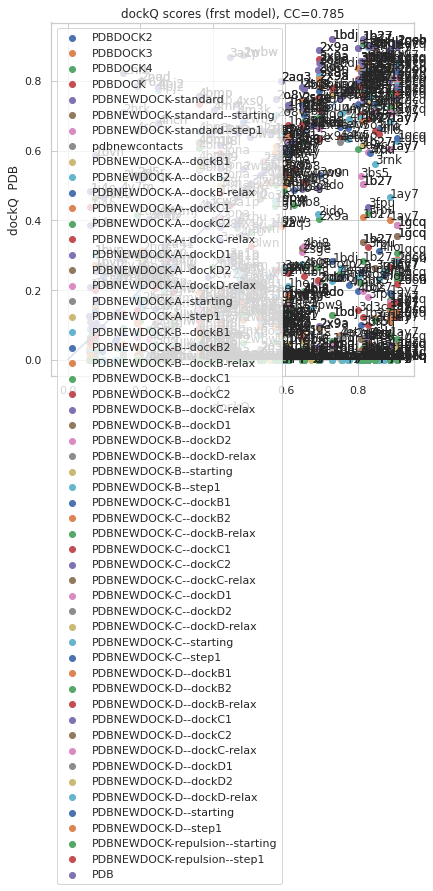

In [364]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDB|^pdb")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-repulsion--step1')

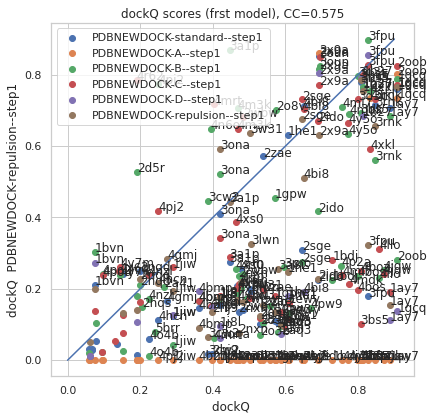

In [365]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*step1.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDB')

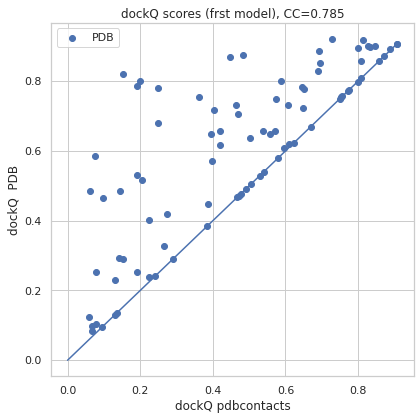

In [366]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["PDB"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ pdbcontacts")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'pdbconfold'

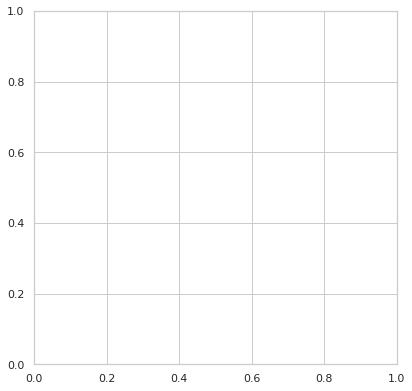

KeyError: 'pdbconfold'

In [367]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("pdbconfold")
pdbset=list(filter(r.match, datasets))
pdbset=["pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="outer")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        #if (df_merged.dockQ_y[i]- df_merged.dockQ_x[i]>cutoff):
        #    ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ PDB")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

No handles with labels found to put in legend.


Text(0, 0.5, 'dockQ  pdbconfold')

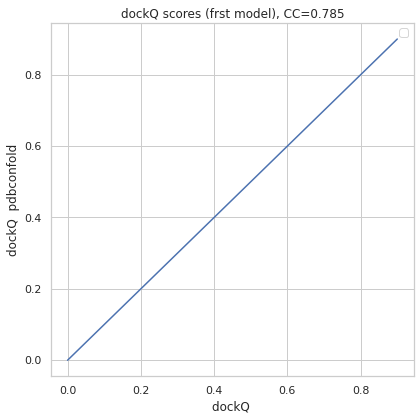

In [368]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-[ABCD]$")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockB-relax')

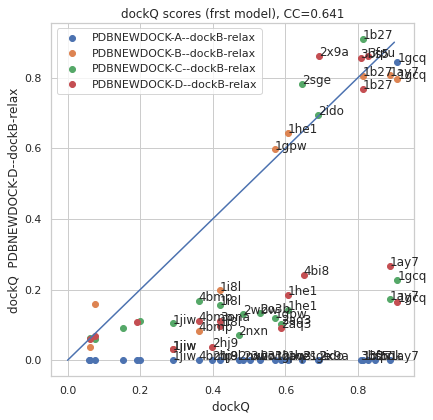

In [369]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockB-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockC-relax')

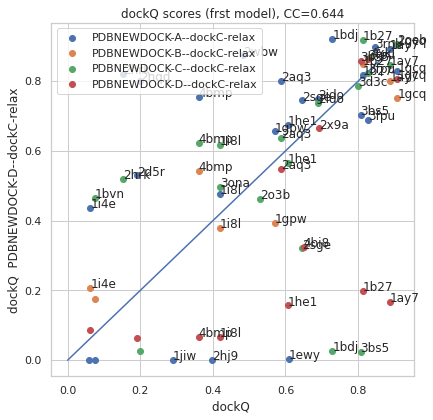

In [370]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockC-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

Text(0, 0.5, 'dockQ  PDBNEWDOCK-D--dockD-relax')

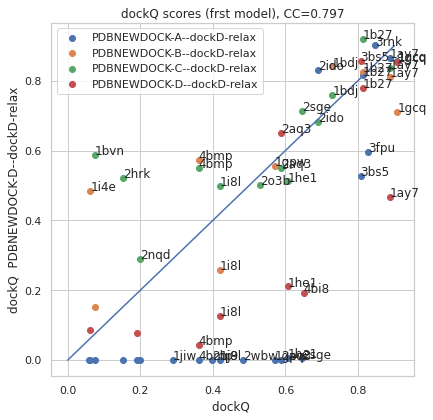

In [371]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile(".*dockD-relax.*")
pdbset=list(filter(r.match, datasets))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-C'

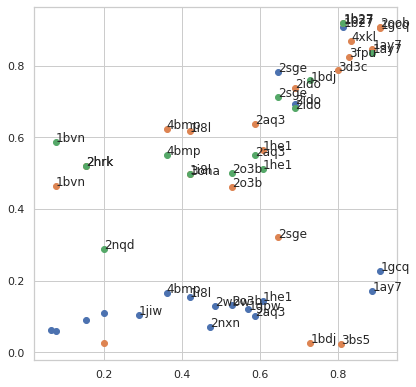

KeyError: 'PDBNEWDOCK-C'

In [372]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-B'

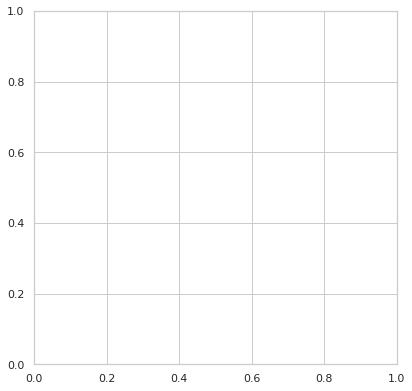

KeyError: 'PDBNEWDOCK-B'

In [373]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["pdbcontacts"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

KeyError: 'PDBNEWDOCK-repulsion'

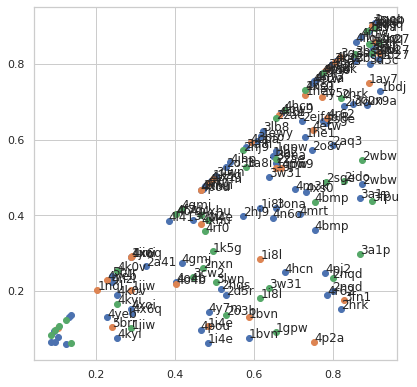

KeyError: 'PDBNEWDOCK-repulsion'

In [374]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
r=re.compile("^PDBNEWDOCK-C.*-relax.*")
pdbset=list(filter(r.match, datasets))+["PDBNEWDOCK-C"]
pdbset=["pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard","PDBNEWDOCK-repulsion","pdbconfold"]

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    #if d=="pdbcontacts":continue
    df_merged = pd.merge(data_max["PDB"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [375]:
r=re.compile(".*relax.*")
#pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts"]
pdbset=sorted(["PDB","PDBNEWDOCK-B","PDBNEWDOCK-C","PDBNEWDOCK-A--dockC-relax",
        "PDBNEWDOCK-C--dockC-relax","PDBNEWDOCK-B--dockD-relax",
        "PDBNEWDOCK-C--dockD-relax","pdbcontacts","pdbnewcontacts","PDBNEWDOCK-standard",
               "PDBNEWDOCK-repulsion","pdbconfold"])


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A--dockC-relax")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-C")&(df_max.params.isin(pdbset) )]["CODE"].unique()

codes=smallset

In [376]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()

PDB
PDBNEWDOCK-A--dockC-relax
PDBNEWDOCK-B
PDBNEWDOCK-B--dockD-relax
PDBNEWDOCK-C
PDBNEWDOCK-C--dockC-relax
PDBNEWDOCK-C--dockD-relax
PDBNEWDOCK-repulsion
PDBNEWDOCK-standard
pdbconfold
pdbcontacts
pdbnewcontacts


IndexError: index out of bounds

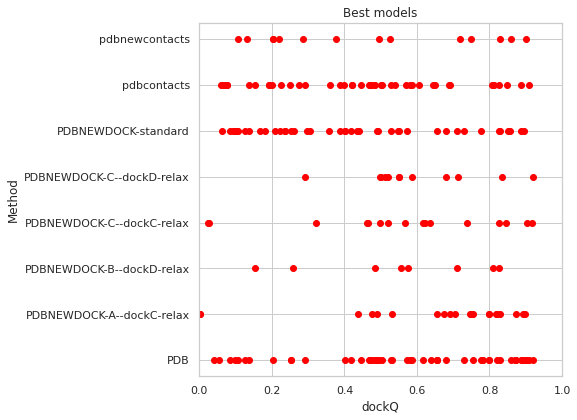

IndexError: index out of bounds

In [377]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [378]:
datasets

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [379]:
pdbset=[ 'N3dock',
       'N3-newdockA', 'N3-newdockB', 'N3-newdockC', 'N5-newdockA','N5-newdockB',
       'N5-newdockC', '-N 5 --cpu 8',"-N 3 --cpu 8"]
codes=df_max.loc[(df_max.params=="N3-newdockC")&(df_max.params.isin(pdbset) )]["CODE"].unique()
codes

array(['1ay7', '1b27', '1bvn', '1gcq', '1gpw', '1he1', '1i4e', '1i8l',
       '2aq3', '2b4s', '2d5r', '2hj9', '2hrk', '2ido', '2nqd', '2nxn',
       '2o3b', '2sge', '2wbw', '2x9a', '2zae', '3a1p', '3a8i', '3bs5',
       '3cw2', '3fpu', '3lwn', '3ona', '3rnk', '3w31', '4bi8', '4bmp',
       '4gmj', '4hcn', '4xhu'], dtype=object)

KeyError: '-N 5 --cpu 8'

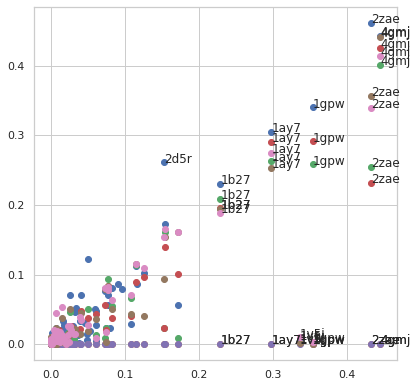

KeyError: '-N 5 --cpu 8'

In [380]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))

for d in pdbset:
    #if d!="N1-merged":continue   
    #print (d)
    if d=="-N 3 --cpu 8":continue
    df_merged = pd.merge(data_max["-N 3 --cpu 8"],data_max[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    cc=np.corrcoef(df_merged.dockQ_x,df_merged.dockQ_y)
    #print (cc)
    
    
    plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
x=[0,0.9]
y=[0,0.9]
plt.plot(x,y)
ax.legend()
ax.set_title("dockQ scores (frst model), CC=" + str(round(cc[0,1],3)) )
ax.set_xlabel("dockQ ")
ax.set_ylabel("dockQ  "+d)

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

-N 3 --cpu 8 35
-N 5 --cpu 8 0
N3-newdockA 34
N3-newdockB 30
N3-newdockC 35
N3dock 35
N5-newdockA 35
N5-newdockB 35
N5-newdockC 35


IndexError: index out of bounds

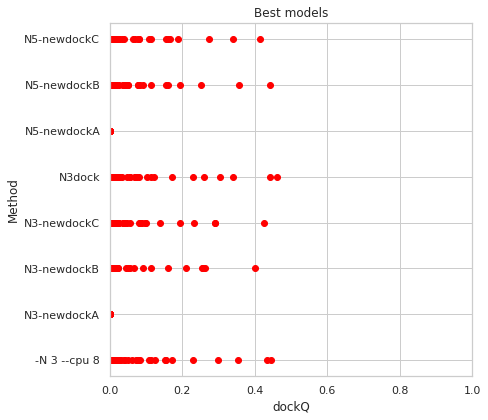

IndexError: index out of bounds

In [381]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    print (d,len(data[i]))
    i+=1
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [382]:
pdbset=sorted(["N1","N3"])

In [383]:
for d in pdbset:
    print (d,len(df_max.loc[(df_max.params==d)]["CODE"].unique()))

N1 0
N3 0


In [384]:
all_df

JHparams  code                 name  lenA  lenB     msa     msaA  \
0    -N 3 --cpu 8  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   2034.0   
1    -N 3 --cpu 8  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   2034.0   
2    -N 3 --cpu 8  1bvn  1bvn_u2_A-1bvn_u1_A   496   496    95.0  52623.0   
3    -N 3 --cpu 8  1gcq  1gcq_u2_A-1gcq_u1_A    66    66  1365.0  77704.0   
4    -N 3 --cpu 8  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0  67629.0   
..            ...   ...                  ...   ...   ...     ...      ...   
269   N5-newdockC  4bi8  4bi8_u1_A-4bi8_u2_A   164    94    51.0    291.0   
270   N5-newdockC  4bmp  4bmp_u1_A-4bmp_u2_A   301   118  4607.0   9429.0   
271   N5-newdockC  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   6344.0   
272   N5-newdockC  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     1.0     20.0   
273   N5-newdockC  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   9970.0   

        msaB   cdhit  dockQ  ...  CODE        params      tmAB    msaAB  \
0     2034.0  1026.0  0.298  ...  1ay7  -N 3 --cpu 8  0.828190   1759.5   
1     2034.0   656.0  0.229  ...  1b27  -N 3 --cpu 8  0.824750   1759.0   
2    52623.0    85.0  0.013  ...  1bvn  -N 3 --cpu 8  0.619740  26373.0   
3    77704.0   771.0  0.115  ...  1gcq  -N 3 --cpu 8  0.555390  77600.5   
4    67629.0  5348.0  0.354  ...  1gpw  -N 3 --cpu 8  0.889770  63047.5   
..       ...     ...    ...  ...   ...           ...       ...      ...   
269    382.0    50.0  0.026  ...  4bi8   N5-newdockC  0.695005    336.5   
270  15729.0  2901.0  0.004  ...  4bmp   N5-newdockC  0.811060  12579.0   
271   6344.0   546.0  0.414  ...  4gmj   N5-newdockC  0.831935   3998.5   
272  41925.0     1.0  0.014  ...  4hcn   N5-newdockC  0.467315  20972.5   
273   9970.0   240.0  0.007  ...  4xhu   N5-newdockC  0.730560   5259.0   

     tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
0     0.84625     2034.0   0.81013     1485.0      53.985  187  
1     0.85428     2034.0   0.79522     1484.0      49.025  199  
2     0.70905    52623.0   0.53043      123.0       0.000  571  
3     0.63426    77704.0   0.52080    77497.0      71.760  123  
4     0.89718    67629.0   0.88236    58466.0     130.000  456  
..        ...        ...       ...        ...         ...  ...  
269   0.78100      382.0   0.60901      291.0       0.000  258  
270   0.86858    15729.0   0.75354     9429.0       0.000  419  
271   0.85148     6344.0   0.82721     1653.0     139.104  489  
272   0.61756    41925.0   0.31707       20.0       0.000  327  
273   0.75557     9970.0   0.70555      548.0       0.000  447  

[274 rows x 53 columns]

In [385]:
cutoff=0.2
newdf=df_max.loc[df_max.dockQ>cutoff]
newdf=newdf.reset_index()


In [386]:
datasets

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [387]:
r=re.compile(".*relax.*")
pdbset=list(filter(r.match, datasets))+['PDBNEWDOCK-A','PDBNEWDOCK-B', 'PDBNEWDOCK-C', 'PDBNEWDOCK-D',"pdbcontacts","pdbconfold","PDB"]


smallset=["1ay7", "1b27", "1bvn", "1gcq", "1gpw", "1he1", "1i4e", "1i8l",
"1jiw", "1k5g", "1nql", "1vg0", "2aq3", "2b4s", "2d5r", "2grx",
"2hj9", "2hrk", "2ido", "2nqd", "2nxn", "2o3b", "2sge", "2wbw",
"2x9a", "2xwb", "2zae", "3a1p", "3a8i", "3bs5", "3buz", "3cw2",
"3cw2", "3fpu", "3lwn", "3ona", "3rnk", "3vlb", "3w31", "3wkt",
"4bi8", "4bmp", "4gmj", "4hcn", "4k0v", "4kyi", "4o4b", "4rf0",
"4xhu", "4yoc"]
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
codes=smallset
codes=df_max.loc[(df_max.params=="PDBNEWDOCK-A")&(df_max.params.isin(pdbset) )]["CODE"].unique()


ValueError: zero-size array to reduction operation minimum which has no identity

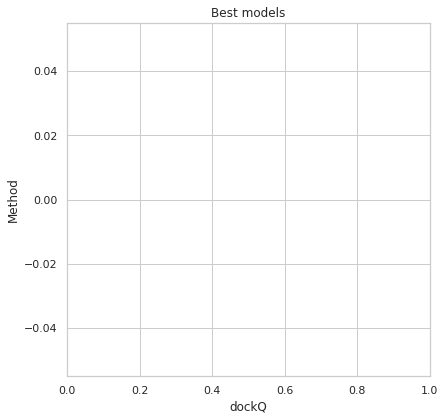

ValueError: zero-size array to reduction operation minimum which has no identity

In [388]:
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
#plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
#plt.scatter(best_df.dockQ,best_df.JHparams,color="red")


all_df=df_max.loc[(df_max.CODE.isin(codes))&(df_max.params.isin(pdbset))].reset_index()
plt.scatter(all_df.dockQ,all_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(all_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    #numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[all_df.JHparams[i]]==0:
        done[all_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[all_df.JHparams[i]],3))+"("+str(length[all_df.JHparams[i]])+")"
                    ,(1.0, all_df.JHparams[i]))


In [389]:
codes

array([], dtype=object)

In [390]:
all_df

Empty DataFrame
Columns: [JHparams, code, name, lenA, lenB, msa, msaA, msaB, cdhit, dockQ, fnat, iRMS, LRMS, fnonnat, mm, tmA, tmB, long, med, longPPV, medPPV, longA, medA, longPPVA, medPPVA, longB, medB, longPPVB, medPPVB, short, shortPPV, shortA, shortPPVA, shortB, shortPPVB, shortpdb, medpdb, longpdb, avprob, auc, evalue, seqid, rank, CODE, params, tmAB, msaAB, tmAB_max, msaAB_max, tmAB_min, msaAB_min, numcorrect, len]
Index: []

[0 rows x 53 columns]

IndexError: index out of bounds

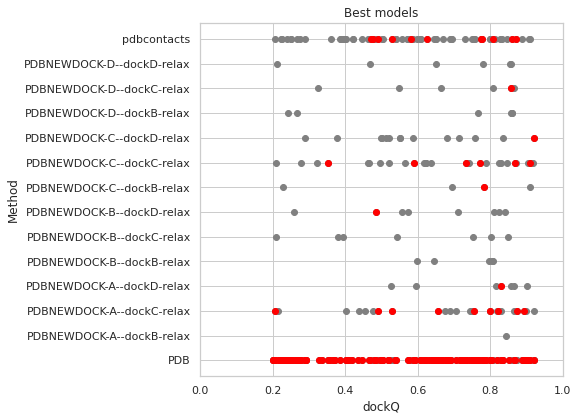

IndexError: index out of bounds

In [391]:
# FInd best method for each model.
codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3))+"("+str(length[good_df.JHparams[i]])+")"
                    ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


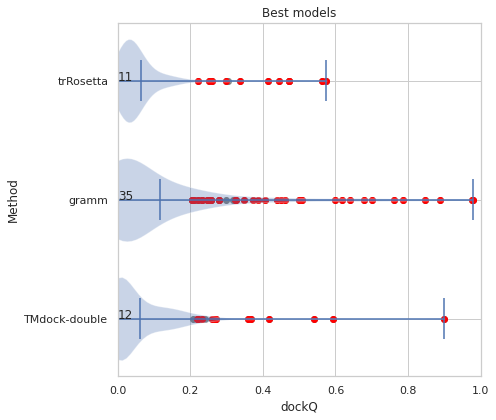

In [392]:
compareset=["trRosetta","gramm","TMdock-double"]
codes=df_max.loc[df_max.params.isin(compareset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
tempdf=newdf.loc[newdf.JHparams.isin(compareset)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(compareset))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(compareset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    #print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        #ax.annotate(str(round(average[best_df.JHparams[i]],3))+
        #            "("+str(length[good_df.JHparams[i]])+")"
        #            ,(1.0, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        #ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


In [393]:
best_df

index       JHparams  code                 name  lenA  lenB     msa  \
0     890          gramm  2hrk  2hrk_u1_A-2hrk_u2_A   181   121     0.0   
1     901          gramm  3qc8  3qc8_u1_A-3qc8_u2_A   169    82     0.0   
2     841  TMdock-double  3bs5  3bs5_u1_A-3bs5_u2_A    84    76     0.0   
3     914          gramm  4zfr  4zfr_u1_A-4zfr_u2_A   186    77     0.0   
4     882          gramm  1uug  1uug_u1_A-1uug_u2_A   230    83     0.0   
5     896          gramm  3g3a  3g3a_u1_A-3g3a_u2_A   166   130     0.0   
6     906          gramm  4emj  4emj_u1_A-4emj_u2_A   403   106     0.0   
7     900          gramm  3prp  3prp_u1_A-3prp_u2_A   184    77     0.0   
8     877          gramm  1clv  1clv_u1_A-1clv_u2_A   471    33     0.0   
9     889          gramm  2g45  2g45_u1_A-2g45_u2_A   114    77     0.0   
10    887          gramm  1zlh  1zlh_u1_A-1zlh_u2_A   306    76     0.0   
11    884          gramm  1wq1  1wq1_u1_A-1wq1_u2_A   325   167     0.0   
12    840  TMdock-double  2sge  2sge_u1_A-2sge_u2_A   186    57     0.0   
13   1032      trRosetta  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2536.0   
14   1035      trRosetta  2zae  2zae_u2_A-2zae_u1_A   107   107  1125.0   
15    843  TMdock-double  3qlu  3qlu_u1_A-3qlu_u2_A   384   374     0.0   
16    894          gramm  3daw  3daw_u1_A-3daw_u2_A   360   143     0.0   
17    876          gramm  1cc0  1cc0_u1_A-1cc0_u2_A   178   149     0.0   
18   1036      trRosetta  4gmj  4gmj_u2_A-4gmj_u1_A   253   253  1189.0   
19   1030      trRosetta  1vrs  1vrs_u2_A-1vrs_u1_A   124   124  2091.0   
20    893          gramm  3d5r  3d5r_u1_A-3d5r_u2_A   295    62     0.0   
21    905          gramm  4cu4  4cu4_u1_A-4cu4_u2_A   706    22     0.0   
22   1028      trRosetta  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7203.0   
23    885          gramm  1x86  1x86_u1_A-1x86_u2_A   353   181     0.0   
24    834  TMdock-double  1ay7  1ay7_u1_A-1ay7_u2_A    97    90     0.0   
25   1033      trRosetta  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
26    881          gramm  1rpq  1rpq_u1_A-1rpq_u2_A   174    22     0.0   
27    879          gramm  1g73  1g73_u1_A-1g73_u2_A   174    97     0.0   
28    875          gramm  1bvn  1bvn_u1_A-1bvn_u2_A   496    75     0.0   
29    838  TMdock-double  2nxn  2nxn_u1_A-2nxn_u2_A   255   148     0.0   
30    846  TMdock-double  4ilh  4ilh_u1_A-4ilh_u2_A   301   256     0.0   
31    912          gramm  4nzl  4nzl_u1_A-4nzl_u2_A   219   100     0.0   
32   1029      trRosetta  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
33    898          gramm  3mj7  3mj7_u1_A-3mj7_u2_A   228   187     0.0   
34    892          gramm  2qyi  2qyi_u1_A-2qyi_u2_A   224   180     0.0   
35   1037      trRosetta  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
36    888          gramm  2bcg  2bcg_u1_A-2bcg_u2_A   440   179     0.0   
37    913          gramm  4xs0  4xs0_u1_A-4xs0_u2_A   147   141     0.0   
38    844  TMdock-double  4bi8  4bi8_u1_A-4bi8_u2_A   164    94     0.0   
39    836  TMdock-double  1jtd  1jtd_u1_A-1jtd_u2_A   270   264     0.0   
40   1031      trRosetta  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   
41    837  TMdock-double  2bwe  2bwe_u1_A-2bwe_u2_A    78    47     0.0   
42    880          gramm  1lfd  1lfd_u1_A-1lfd_u2_A   167    88     0.0   
43    895          gramm  3f1p  3f1p_u1_A-3f1p_u2_A   120   115     0.0   
44   1027      trRosetta  1b27  1b27_u2_A-1b27_u1_A   109   109   733.0   
45    878          gramm  1ewy  1ewy_u1_A-1ewy_u2_A   304    99     0.0   
46    911          gramm  4mdk  4mdk_u1_A-4mdk_u2_A   165    77     0.0   
47    910          gramm  4j38  4j38_u1_A-4j38_u2_A   152   124     0.0   
48    909          gramm  4hcn  4hcn_u1_A-4hcn_u2_A   250    77     0.0   
49    899          gramm  3oj4  3oj4_u1_A-3oj4_u2_A   151    77     0.0   
50    848  TMdock-double  4wm0  4wm0_u1_A-4wm0_u2_A   291    40     0.0   
51    904          gramm  4cpa  4cpa_u1_A-4cpa_u2_A   308    40     0.0   
52    847  TMdock-double  4j4

In [394]:
codes

array(['1ay7', '1b27', '1bdj', '1buh', '1bvn', '1cc0', '1clv', '1dfj',
       '1eay', '1eer', '1ewy', '1fle', '1fq1', '1g6v', '1g73', '1gcq',
       '1gg2', '1gpw', '1he1', '1i2m', '1i4e', '1i8l', '1ib1', '1jiw',
       '1jk9', '1jtd', '1k5g', '1kgy', '1lb2', '1lfd', '1mq8', '1nbf',
       '1nql', '1nw9', '1oc0', '1pvh', '1qav', '1r8s', '1rpq', '1s1q',
       '1te1', '1tmq', '1uug', '1v5i', '1vg0', '1wq1', '1wrd', '1x86',
       '1xt9', '1y64', '1y8x', '1ycs', '1yu6', '1yvb', '1z5y', '1zlh',
       '2a41', '2a5d', '2a9k', '2abz', '2aq3', '2b4s', '2bcg', '2bcn',
       '2bku', '2bwe', '2c0l', '2c2v', '2ch4', '2d5r', '2ejf', '2g45',
       '2grx', '2gwf', '2hj9', '2hqs', '2hrk', '2i25', '2ido', '2iwt',
       '2nqd', '2nxn', '2o25', '2o2v', '2o3b', '2o8v', '2oob', '2qyi',
       '2sge', '2uy7', '2v55', '2vdb', '2vrr', '2wbw', '2wy7', '2wy8',
       '2x9a', '2xgy', '2xwb', '2zae', '3a1p', '3a8i', '3av0', '3bh6',
       '3bs5', '3buz', '3bx1', '3cbk', '3cu1', '3cw2', '3d3c', '3d5r',
      

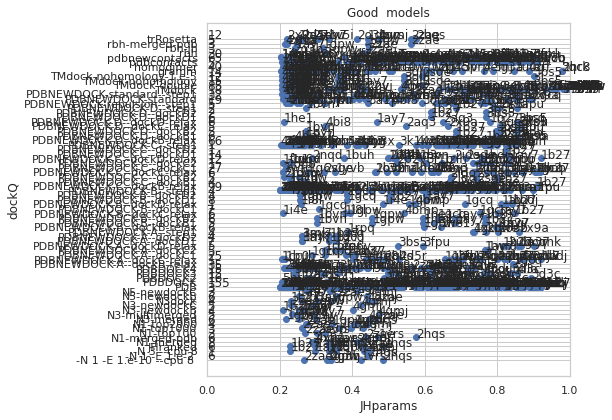

In [395]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
ax.set_title("Good  models")
ax.set_xlabel("JHparams")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

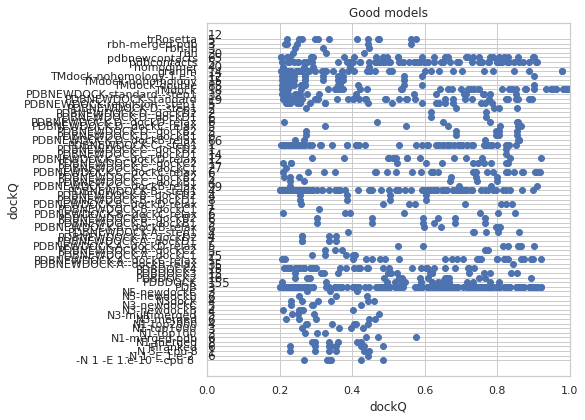

In [396]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

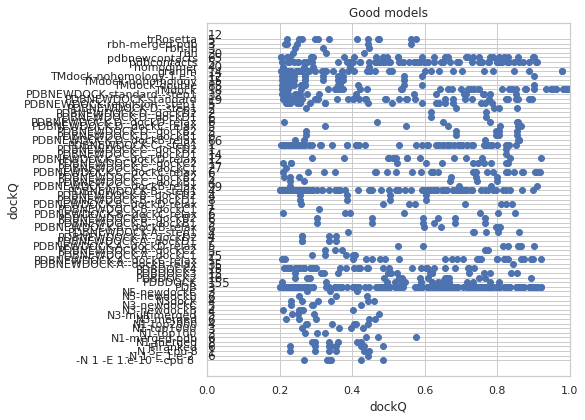

In [397]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(newdf.dockQ,newdf.JHparams)
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
for d in datasets:
    done[d]=0
for i, txt in enumerate(newdf.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(newdf.loc[newdf.JHparams==newdf.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[newdf.JHparams[i]]==0:
        done[newdf.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, newdf.JHparams[i]))

In [398]:
datasets

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [399]:
# here we find what method is best for each target

r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print(excludecolumns)
excludecolumns+=["confold","rbh-merged-pdb"]
tempdf=newdf.loc[~newdf.JHparams.isin(excludecolumns)]

#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['code']).reset_index()
best_df.sort_values("JHparams")

['gramm', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEW

index        JHparams  code                 name  lenA  lenB     msa  \
5      15        JHranked  1gpw  1gpw_u2_A-1gpw_u1_A   252   252  7137.0   
6      16        JHranked  1v5i  1v5i_u2_A-1v5i_u1_A   276   276  1922.0   
4      23       N1-merged  2o3b  2o3b_u2_A-2o3b_u1_A   240   240   456.0   
8      26       N1-merged  4xhu  4xhu_u2_A-4xhu_u1_A   352   352   410.0   
0      28   N1-merged-pdb  2hqs  2hqs_u2_A-2hqs_u1_A   398   398  2368.0   
2      27   N1-merged-pdb  1vrs  1vrs_u2_A-1vrs_u1_A   124   124   836.0   
3      46       N3-merged  2zae  2zae_u1_A-2zae_u2_A   107    93  1125.0   
10     44       N3-merged  1b27  1b27_u1_A-1b27_u2_A   109    90   733.0   
1      51  N3-multimerged  4gmj  4gmj_u1_A-4gmj_u2_A   253   236  1189.0   
7      61          N3dock  1ay7  1ay7_u2_A-1ay7_u1_A    97    97  1060.0   
9      64          N3dock  2d5r  2d5r_u2_A-2d5r_u1_A   265   265   521.0   

       msaA     msaB   cdhit  ...  CODE          params      tmAB    msaAB  \
5   67629.0  58466.0  5343.0  ...  1gpw        JHranked  0.889770  63047.5   
6   54177.0  54177.0  1646.0  ...  1v5i        JHranked  0.826270  33121.5   
4    5431.0   5431.0   301.0  ...  2o3b       N1-merged  0.727490   2974.5   
8    8381.0   8381.0   234.0  ...  4xhu       N1-merged  0.829155   4344.0   
0    9156.0   9156.0  1989.0  ...  2hqs   N1-merged-pdb  0.969605   6972.0   
2    1396.0   1396.0   806.0  ...  1vrs   N1-merged-pdb  0.989810   1320.5   
3    1659.0   1521.0   839.0  ...  2zae       N3-merged  0.805725   1590.0   
10   1484.0   2034.0   654.0  ...  1b27       N3-merged  0.801155   1759.0   
1    6152.0   1646.0   523.0  ...  4gmj  N3-multimerged  0.804275   3899.0   
7    2034.0   2034.0   989.0  ...  1ay7          N3dock  0.824190   1759.5   
9    6154.0   6154.0   226.0  ...  2d5r          N3dock  0.774685   3962.5   

    tmAB_max  msaAB_max  tmAB_min  msaAB_min  numcorrect  len  
5    0.89718    67629.0   0.88623    58466.0     179.000  456  
6    0.89294    54177.0   0.75960    12066.0       1.000  354  
4    0.83406     5431.0   0.62495      518.0      29.008  384  
8    0.84232     8381.0   0.81599      307.0      19.910  447  
0    0.97016     9156.0   0.96905     4788.0     100.035  507  
2    0.99288     1396.0   0.98674     1245.0      53.988  241  
3    0.83174     1659.0   0.77971     1521.0      80.990  200  
10   0.83041     2034.0   0.77190     1484.0      49.025  199  
1    0.82865     6152.0   0.77990     1646.0     139.104  489  
7    0.84528     2034.0   0.80310     1485.0      53.985  187  
9    0.87927     6154.0   0.68937     1771.0      17.996  386  

[11 rows x 54 columns]

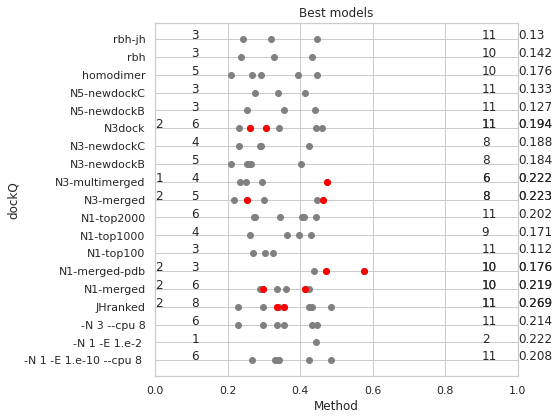

In [400]:
# FInd best method for each model.
codes=best_df["code"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
good_df=newdf.loc[(newdf.code.isin(codes))&(~newdf.JHparams.isin(excludecolumns))].reset_index()
plt.scatter(good_df.dockQ,good_df.JHparams,color="grey")
plt.scatter(best_df.dockQ,best_df.JHparams,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_xlabel("Method")
ax.set_ylabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
for d in datasets:
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.JHparams==best_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[best_df.JHparams[i]]==0:
        done[best_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.0, best_df.JHparams[i]))
        ax.annotate(str(round(average[best_df.JHparams[i]],3)),(1.0, best_df.JHparams[i]))
        ax.annotate(str(length[best_df.JHparams[i]]),(.9, best_df.JHparams[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.JHparams[i]])
    #print (numhit,newdf.JHparams[i])
    if done[good_df.JHparams[i]]==0:
        done[good_df.JHparams[i]]=1
        ax.annotate(str(numhit),(.1, good_df.JHparams[i]))
        ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        ax.annotate(str(length[good_df.JHparams[i]]),(.9, good_df.JHparams[i]))


In [401]:
df.sort_values('dockQ', ascending=False).drop_duplicates(["code"])

name                 JHparams lenA lenB  msa    msaA  \
14826  1nbf_u1_A-1nbf_u2_A                   TMdock  340   78    0       0   
14836  1nql_u1_A-1nql_u2_A                   TMdock  613   54    0       0   
15747  3kld_u1_A-3kld_u2_A                   TMdock  384  265    0       0   
14866  1pvh_u1_A-1pvh_u2_A                   TMdock  209  160    0       0   
14876  1qav_u1_A-1qav_u2_A                   TMdock  113   88    0       0   
...                    ...                      ...  ...  ...  ...     ...   
5355   4yoc_u1_A-4yoc_u2_A                 PDBDOCK4  905  530  333   31492   
14235  4ol0_u1_A-4ol0_u2_A        TMdock-nohomology  890  206    0       0   
3702   4c0o_u2_A-4c0o_u1_A  -N 1 -E 1.e-10 --cpu 8   114  890  476    2618   
17083  4rws_u1_A-4rws_u2_A                trRosetta  434   72    2  150628   
18588  4v2c_u2_A-4v2c_u1_A                trRosetta  107  324  184     819   

        msaB  cdhit  dockQ    fnat  ...  CODE                   params  \
14826      0      1      1       0  ...  1nbf                   TMdock   
14836      0      1      1       0  ...  1nql                   TMdock   
15747      0      1      1       0  ...  3kld                   TMdock   
14866      0      1      1       0  ...  1pvh                   TMdock   
14876      0      1      1   0.001  ...  1qav                   TMdock   
...      ...    ...    ...     ...  ...   ...                      ...   
5355    4076    187  0.054   0.159  ...  4yoc                 PDBDOCK4   
14235      0  0.037  0.053  20.385  ...  4ol0        TMdock-nohomology   
3702    2762    285  0.021       0  ...  4c0o  -N 1 -E 1.e-10 --cpu 8    
17083   4909      2  0.015   0.016  ...  4rws                trRosetta   
18588  48577     30  0.012       0  ...  4v2c                trRosetta   

             tmAB    msaAB   tmAB_max msaAB_max tmAB_min msaAB_min numcorrect  \
14826    0.500000      0.0    1.00000       0.0  0.00000       0.0          0   
14836   24.000000      0.0   47.00000       0.0  1.00000       0.0          0   
15747    1.000000      0.0    1.00000       0.0  1.00000       0.0          0   
14866    0.500000      0.0    1.00000       0.0  0.00000       0.0          0   
14876  480.500000      0.0  960.00000       0.0  1.00000       0.0          0   
...           ...      ...        ...       ...      ...       ...        ...   
5355     0.253670  17784.0    0.32173   31492.0  0.18561    4076.0          0   
14235    1.500000      0.0    2.00000       0.0  1.00000       0.0          0   
3702     0.497665   2690.0    0.55139    2762.0  0.44394    2618.0          0   
17083    0.247900  77768.5    0.26704  150628.0  0.22876    4909.0          0   
18588    0.735230  24698.0    0.85675   48577.0  0.61371     819.0          0   

        len  
14826   418  
14836   667  
15747   649  
14866   369  
14876   201  
...     ...  
5355   1435  
14235  1096  
3702   1004  
17083   506  
18588   431  

[218 rows x 53 columns]

In [402]:
df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].groupby("name").max()


JHparams  lenA  lenB     msa      msaA      msaB  \
name                                                                      
1ay7_u1_A-1ay7_u2_A      rbh-jh    97    90  1060.0    1485.0    2034.0   
1ay7_u2_A-1ay7_u1_A   homodimer    90    97  1060.0    2034.0    1485.0   
1b27_u1_A-1b27_u2_A   homodimer   109    90   733.0    1484.0    2034.0   
1b27_u2_A-1b27_u1_A   homodimer    90   109   733.0    2034.0    1484.0   
1gpw_u1_A-1gpw_u2_A      rbh-jh   252   204  7137.0   58466.0   67629.0   
1gpw_u2_A-1gpw_u1_A      rbh-jh   204   252  7137.0   67629.0   58466.0   
1v5i_u1_A-1v5i_u2_A    JHranked   276    78  1922.0   54177.0   12066.0   
1vrs_u1_A-1vrs_u2_A  N1-top2000   124   117   836.0  100319.0    2803.0   
1vrs_u2_A-1vrs_u1_A  N1-top2000   117   124  2091.0    2803.0  100319.0   
2d5r_u2_A-2d5r_u1_A      N3dock   121   265   521.0    1771.0    6154.0   
2hqs_u1_A-2hqs_u2_A  N1-top2000   398   109  2396.0  376708.0   32336.0   
2hqs_u2_A-2hqs_u1_A  N1-top2000   109   398  2396.0   15892.0   13281.0   
2o3b_u1_A-2o3b_u2_A         rbh   240   144   100.0    5431.0     518.0   
2zae_u1_A-2zae_u2_A      rbh-jh   107    93  1125.0    1818.0    1521.0   
2zae_u2_A-2zae_u1_A      rbh-jh    93   107  1125.0    1521.0    1818.0   
4gmj_u1_A-4gmj_u2_A   homodimer   253   236  1189.0    6344.0    1653.0   
4gmj_u2_A-4gmj_u1_A   homodimer   236   253  1189.0    1653.0    6344.0   
4xhu_u1_A-4xhu_u2_A   N1-merged   352    95   211.0    8381.0     307.0   
4xhu_u2_A-4xhu_u1_A   N1-merged    95   352   410.0     307.0    8381.0   

                      cdhit  dockQ   fnat    iRMS  ...  CODE      params  \
name                                               ...                     
1ay7_u1_A-1ay7_u2_A  1026.0  0.305  0.306   4.002  ...  1ay7      rbh-jh   
1ay7_u2_A-1ay7_u1_A   989.0  0.260  0.306   4.433  ...  1ay7   homodimer   
1b27_u1_A-1b27_u2_A   654.0  0.252  0.160   4.793  ...  1b27   homodimer   
1b27_u2_A-1b27_u1_A   656.0  0.229  0.160   5.319  ...  1b27   homodimer   
1gpw_u1_A-1gpw_u2_A  5348.0  0.351  0.320   5.201  ...  1gpw      rbh-jh   
1gpw_u2_A-1gpw_u1_A  5343.0  0.354  0.333   3.738  ...  1gpw      rbh-jh   
1v5i_u1_A-1v5i_u2_A  1642.0  0.336  0.191   3.748  ...  1v5i    JHranked   
1vrs_u1_A-1vrs_u2_A   806.0  0.472  0.449   2.953  ...  1vrs  N1-top2000   
1vrs_u2_A-1vrs_u1_A  1977.0  0.324  0.306   7.831  ...  1vrs  N1-top2000   
2d5r_u2_A-2d5r_u1_A   225.0  0.261  0.203  10.074  ...  2d5r      N3dock   
2hqs_u1_A-2hqs_u2_A  2014.0  0.575  0.526   3.771  ...  2hqs  N1-top2000   
2hqs_u2_A-2hqs_u1_A  2017.0  0.480  0.395   2.806  ...  2hqs  N1-top2000   
2o3b_u1_A-2o3b_u2_A    99.0  0.413  0.556   4.959  ...  2o3b         rbh   
2zae_u1_A-2zae_u2_A   839.0  0.463  0.371   6.495  ...  2zae      rbh-jh   
2zae_u2_A-2zae_u1_A   852.0  0.461  0.484   6.490  ...  2zae      rbh-jh   
4gmj_u1_A-4gmj_u2_A   523.0  0.473  0.756   3.975  ...  4gmj   homodimer   
4gmj_u2_A-4gmj_u1_A   546.0  0.445  0.780   4.389  ...  4gmj   homodimer   
4xhu_u1_A-4xhu_u2_A    83.0  0.244  0.185   5.002  ...  4xhu   N1-merged   
4xhu_u2_A-4xhu_u1_A   234.0  0.298  0.481   4.861  ...  4xhu   N1-merged   

                         tmAB     msaAB  tmAB_max  msaAB_max  tmAB_min  \
name                                                                     
1ay7_u1_A-1ay7_u2_A  0.828190    1759.5   0.84625     2034.0   0.81151   
1ay7_u2_A-1ay7_u1_A  0.817620    1759.5   0.84181     2034.0   0.79459   
1b27_u1_A-1b27_u2_A  0.825820    1759.0   0.85658     2034.0   0.79542   
1b27_u2_A-1b27_u1_A  0.810645    1759.0   0.83444     2034.0   0.78685   
1gpw_u1_A-1gpw_u2_A  0.889680   63047.5   0.89449    67629.0   0.88822   
1gpw_u2_A-1gpw_u1_A  0.894335   63047.5   0.89745    67629.0   0.89220   
1v5i_u1_A-1v5i_u2_A  0.818890   33121.5   0.88557    54177.0   0.75221   
1vrs_u1_A-1vrs_u2_A  0.989810   51561.0   0.99288   100319.0   0.98674   
1vrs_u2_A-1vrs_u1_A  0.897465   51561.0   0.98730   100319.0   0.81427   
2d5r_u2_A-2d5r_u1_A  0.752890    396

['gramm', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4', 'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting', 'PDBNEWDOCK-standard--step1', 'pdbnewcontacts', 'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2', 'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1', 'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax', 'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2', 'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting', 'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1', 'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--dockB-relax', 'PDBNEWDOCK-B--dockC1', 'PDBNEWDOCK-B--dockC2', 'PDBNEWDOCK-B--dockC-relax', 'PDBNEWDOCK-B--dockD1', 'PDBNEWDOCK-B--dockD2', 'PDBNEWDOCK-B--dockD-relax', 'PDBNEWDOCK-B--starting', 'PDBNEWDOCK-B--step1', 'PDBNEWDOCK-C--dockB1', 'PDBNEWDOCK-C--dockB2', 'PDBNEWDOCK-C--dockB-relax', 'PDBNEWDOCK-C--dockC1', 'PDBNEWDOCK-C--dockC2', 'PDBNEWDOCK-C--dockC-relax', 'PDBNEWDOCK-C--dockD1', 'PDBNEWDOCK-C--dockD2', 'PDBNEWDOCK-C--dockD-relax', 'PDBNEWDOCK-C--starting', 'PDBNEW

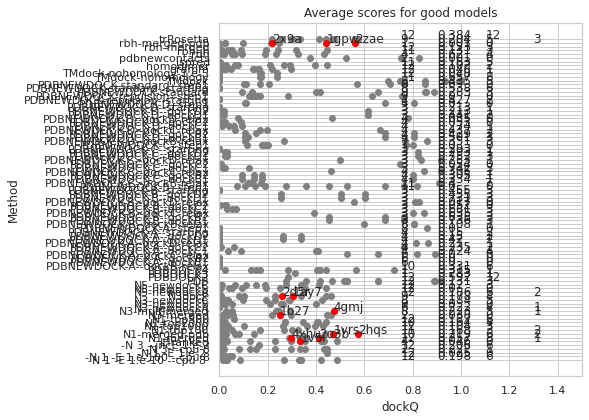

In [403]:
r = re.compile("^PDB.*|^TMd.*|^gramm|trRosetta|^pdb.*")
excludecolumns = list(filter(r.match, datasets)) # Read Note
print (excludecolumns)
includeTR=["pdbcontacts","PDBDOCK","TMdock-double"]
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best methods")

new_df=df.loc[(df.dockQ>cutoff) & (~df.JHparams.isin(excludecolumns))].sort_values('dockQ', ascending=False).drop_duplicates(["code"]).reset_index()
codes=new_df.CODE.unique()
#print(new_df)
#newdf.sort_values(["JHparams","dockQ","code"],inplace=True)

tempdf=df_max.loc[(df_max.CODE.isin(codes)) & (~df_max.params.isin(includeTR))].reset_index()
plt.scatter(tempdf.dockQ,tempdf.params,color="grey")
#print(tempdf[tempdf.params=="N1-top1000"])
plt.scatter(new_df.dockQ,new_df.params,color="red")
#print(new_df[new_df.params=="N1-top1000"])

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Average scores for good models")
ax.set_xlabel("dockQ")
ax.set_ylabel("Method")
ax.set(xlim=[0,1])
done={}
average={}
length={}
ax.set(xlim=[0,1.5])
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
    average[d]=df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[(df_max.CODE.isin(codes)) & (df_max.params==d)]["dockQ"])
for i, txt in enumerate(tempdf.name):
    #print (i,txt, newdf.JHparams[i])
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(tempdf.loc[(tempdf.params==tempdf.params[i])&(tempdf.dockQ>cutoff)])
    
    #print (numhit,newdf.JHparams[i])
    if done[tempdf.params[i]]==0:
        done[tempdf.params[i]]=1
        ax.annotate(str(numhit),(1.1, tempdf.params[i]))
        #ax.annotate("0",(.1, tempdf.JHparams[i]))  
        ax.annotate(str(round(average[tempdf.params[i]],3)),(.9, tempdf.params[i]))          
        ax.annotate(str(round(length[tempdf.params[i]],3)),(.75, tempdf.params[i]))  
for d in datasets: #~df.JHparams.isin(excludecolumns).unique():
    done[d]=0
for i, txt in enumerate(new_df.name):
    #print (i,txt,newdf.dockQ[i], newdf.JHparams[i])
    sstr=txt[0:4]
    ax.annotate(sstr, (new_df.dockQ[i], new_df.params[i]))
    numhit=len(new_df.loc[new_df.params==new_df.params[i]])
    #numhit2=len(tempdf.loc[tempdf.JHparams==tempdf.params[i]])
    #print (numhit,newdf.JHparams[i])
    if done[new_df.params[i]]==0:
        done[new_df.params[i]]=1
        ax.annotate(str(numhit),(1.3, new_df.params[i]))  
        #ax.annotate(str(numhit2),(-0.1, new_df.JHparams[i]))


In [404]:
cutoff=0.1

In [405]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']

cutoff=0.1

In [406]:
goodmodels=df_max.loc[(df_max.dockQ>cutoff)&(df_max.params.isin(JHsets)) ]["CODE"].unique()

/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/arnee/.local/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/arnee/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


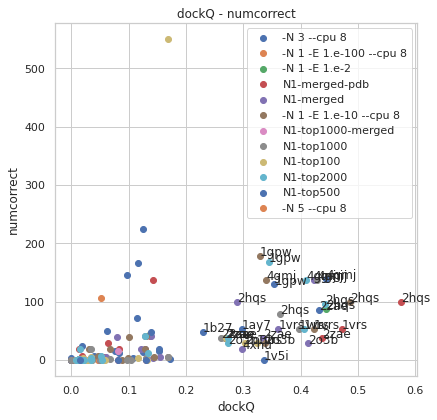

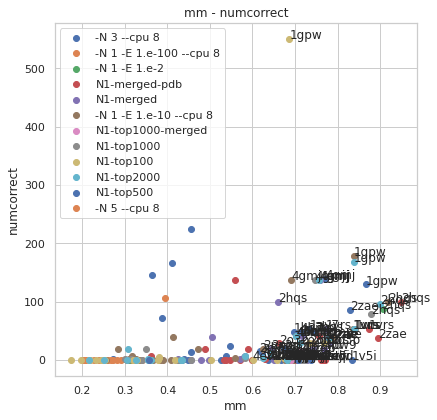

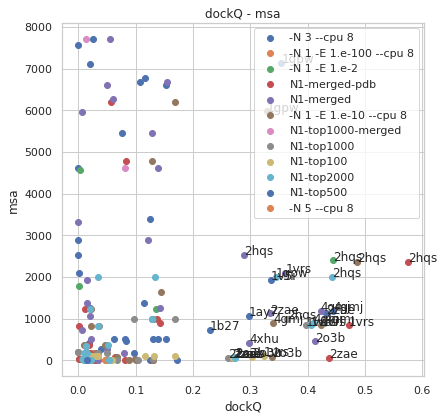

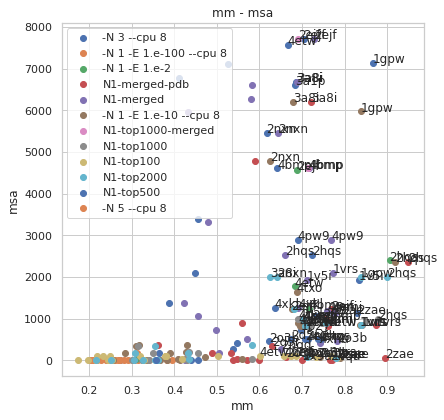

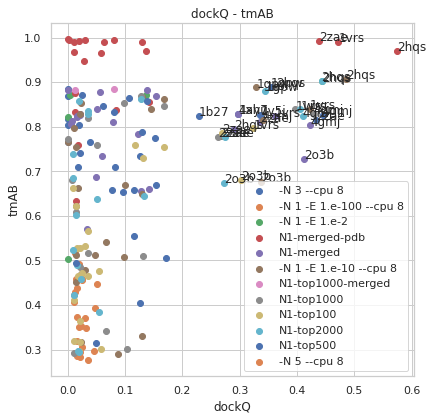

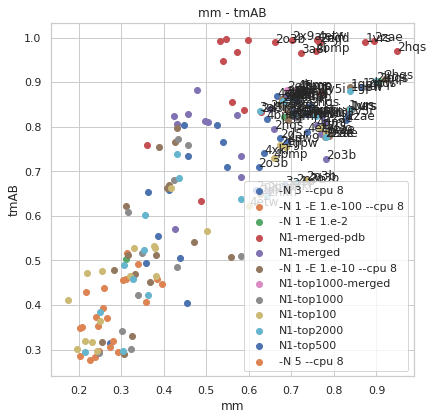

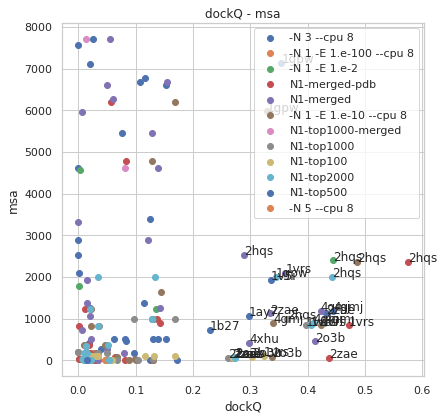

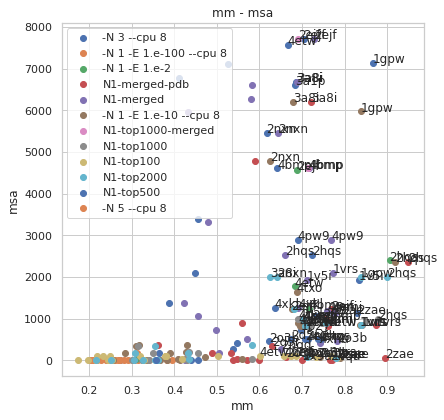

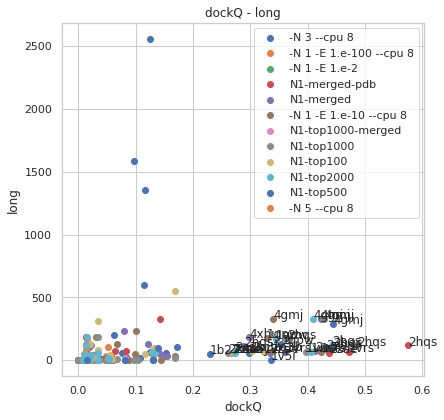

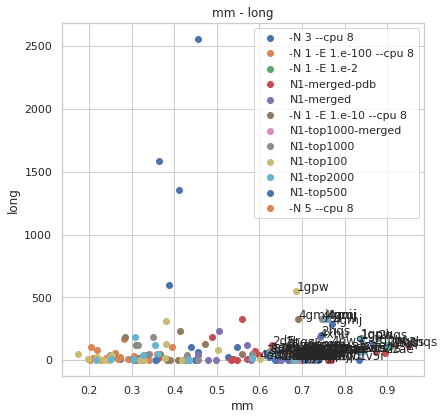

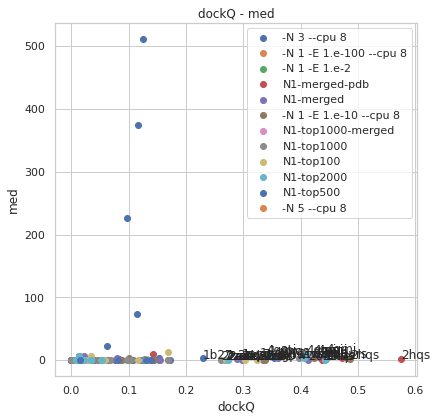

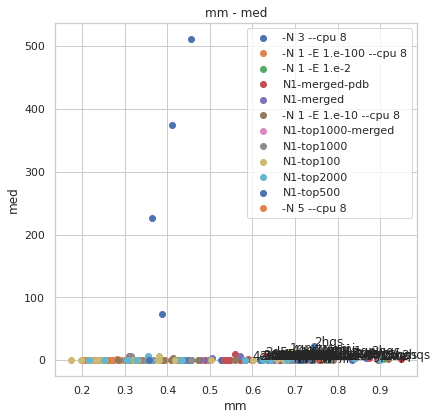

In [407]:
tempdf=df_max.loc[df_max.params.isin(JHsets)] 


tempdf=tempdf.loc[tempdf.CODE.isin(goodmodels)]
cf={"dockQ":0.2,"mm":0.6,"numcorrect":50}
for y in ["numcorrect","msa","tmAB","msa","long","med"]:
    for x in ["dockQ","mm","numcorrect"]:
        cutoff=cf[x]
        #print (Name)
         #if (Name != "lenA"):
        #    continue
        f, ax = plt.subplots(figsize=(6.5, 6.5))
        for d in JHsets:
            xdata=tempdf.loc[tempdf.params==d][x]
            ydata=tempdf.loc[tempdf.params==d][y]
            plt.scatter(xdata,ydata,label=d)
            cc=np.corrcoef(xdata,ydata)
            for i, txt in enumerate(tempdf.loc[tempdf.params==d].name):
                sstr=txt[0:4]
                if (xdata[i]>cutoff):
                    ax.annotate(sstr, (xdata[i], ydata[i]))
        ax.set_title(x + " - " + y )
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.legend()
    plt.close()

In [408]:
datasets

array(['-N 3 --cpu 8', 'gramm', 'homodimer', 'ispred',
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500', 'N3dock',
       '-N 3 --incE 1.e-2', 'N3-merged', 'N3-multimerged', 'N3-newdockA',
       'N3-newdockB', 'N3-newdockC', 'N5-newdockA', 'N5-newdockB',
       'N5-newdockC', 'pdbcontacts', 'PDBDOCK2', 'PDBDOCK3', 'PDBDOCK4',
       'PDBDOCK', 'PDBNEWDOCK-standard', 'PDBNEWDOCK-standard--starting',
       'PDBNEWDOCK-standard--step1', 'pdbnewcontacts',
       'PDBNEWDOCK-A--dockB1', 'PDBNEWDOCK-A--dockB2',
       'PDBNEWDOCK-A--dockB-relax', 'PDBNEWDOCK-A--dockC1',
       'PDBNEWDOCK-A--dockC2', 'PDBNEWDOCK-A--dockC-relax',
       'PDBNEWDOCK-A--dockD1', 'PDBNEWDOCK-A--dockD2',
       'PDBNEWDOCK-A--dockD-relax', 'PDBNEWDOCK-A--starting',
       'PDBNEWDOCK-A--step1', 'PDBNEWDOCK-B--dockB1',
       'PDBNEWDOCK-B--dockB2', 'PDBNEWDOCK-B--do

In [409]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '1ay7', '1b27', '1gcq', '1v5i',
       '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '4pw9', '4xhu',
       '4xkl', '2nqd', '2ejf', '4etw'], dtype=object)

In [444]:
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
tempdf

name  lenA  lenB     msa  \
JHparams                code                                            
-N 1 -E 1.e-100 --cpu 8 1ay7  1ay7_u2_A-1ay7_u1_A    97    97     1.0   
                        1b27  1b27_u2_A-1b27_u1_A   109   109     1.0   
                        1gcq  1gcq_u1_A-1gcq_u2_A    66    57     1.0   
                        1gpw  1gpw_u2_A-1gpw_u1_A   252   252     2.0   
                        1v5i  1v5i_u2_A-1v5i_u1_A   276   276     1.0   
...                                           ...   ...   ...     ...   
N3-multimerged          2o3b  2o3b_u1_A-2o3b_u2_A   240   144   456.0   
                        3a8i  3a8i_u1_A-3a8i_u2_A   352   129  6679.0   
                        4bmp  4bmp_u1_A-4bmp_u2_A   301   118  4607.0   
                        4gmj  4gmj_u1_A-4gmj_u2_A   253   236  1189.0   
                        4xhu  4xhu_u1_A-4xhu_u2_A   352    95   410.0   

                                 msaA     msaB   cdhit  dockQ   fnat     iRMS  \
JHparams                code                                                    
-N 1 -E 1.e-100 --cpu 8 1ay7      0.0      0.0     1.0  0.016  0.000   16.173   
                        1b27      0.0      0.0     1.0  0.048  0.020   15.981   
                        1gcq      0.0      0.0     1.0  0.023  0.000   12.304   
                        1gpw      4.0      4.0     1.0  0.052  0.027   20.153   
                        1v5i     17.0     17.0     1.0  0.012  0.000   17.250   
...                               ...      ...     ...    ...    ...      ...   
N3-multimerged          2o3b   5431.0    518.0   306.0  0.054  0.000    9.740   
                        3a8i  23311.0  13821.0  5778.0  0.104  0.074    6.633   
                        4bmp   9094.0   5510.0  2901.0  0.000  0.000  496.347   
                        4gmj   6152.0   1646.0   523.0  0.473  0.756    3.716   
                        4xhu   8381.0    307.0   240.0  0.027  0.000   12.316   

                              ...  CODE                   params      tmAB  \
JHparams                code  ...                                            
-N 1 -E 1.e-100 --cpu 8 1ay7  ...  1ay7  -N 1 -E 1.e-100 --cpu 8  0.438395   
                        1b27  ...  1b27  -N 1 -E 1.e-100 --cpu 8  0.392775   
                        1gcq  ...  1gcq  -N 1 -E 1.e-100 --cpu 8  0.353945   
                        1gpw  ...  1gpw  -N 1 -E 1.e-100 --cpu 8  0.446580   
                        1v5i  ...  1v5i  -N 1 -E 1.e-100 --cpu 8  0.407020   
...                           ...   ...                      ...       ...   
N3-multimerged          2o3b  ...  2o3b           N3-multimerged  0.721055   
                        3a8i  ...  3a8i           N3-multimerged  0.869425   
                        4bmp  ...  4bmp           N3-multimerged  0.884385   
                        4gmj  ...  4gmj           N3-multimerged  0.804275   
                        4xhu  ...  4xhu           N3-multimerged  0.792555   

                                msaAB  tmAB_max  msaAB_max  tmAB_min  \
JHparams                code                                           
-N 1 -E 1.e-100 --cpu 8 1ay7      0.0   0.46795        0.0   0.40884   
                        1b27      0.0   0.46320        0.0   0.32235   
                        1gcq      0.0   0.39480        0.0   0.31309   
                        1gpw      2.5   0.53791        4.0   0.39558   
                        1v5i      8.5   0.43779       17.0   0.37875   
...                               ...       ...        ...       ...   
N3-multimerged          2o3b   2974.5   0.82468     5431.0   0.61743   
                        3a8i  18566.0   0.88359    23311.0   0.85526   
                        4bmp   7302.0   0.89204     9094.0   0.87673   
                        4gmj   3899.0   0.82865     6152.0   0.77990   
                        4xhu   4344.0   0.84408     8381.0   0.74103   

                              msaAB_min  numcorrect  len  
JHparams                code  

In [443]:
df_max.loc[df_max.params=="N3-multimerged"]["dockQ"]

JHparams        code
N3-multimerged  1ay7    0.294
                1b27    0.249
                1bvn    0.009
                1gcq    0.115
                1gpw    0.235
                1he1    0.060
                1i4e    0.009
                1i8l    0.006
                1jiw    0.014
                1k5g    0.000
                1nql    0.003
                1vg0    0.060
                2hj9    0.019
                2hrk    0.152
                2ido    0.057
                2nqd    0.077
                2nxn    0.085
                2o3b    0.054
                2sge    0.012
                3a8i    0.104
                3bs5    0.029
                3buz    0.047
                3cw2    0.008
                4bi8    0.021
                4bmp    0.000
                4gmj    0.473
                4hcn    0.022
                4o4b    0.010
                4xhu    0.027
Name: dockQ, dtype: float64

-N 1 -E 1.e-2 
-N 3 --cpu 8
N1-merged
N1-merged-pdb
N1-top1000
N3-merged
N3-multimerged


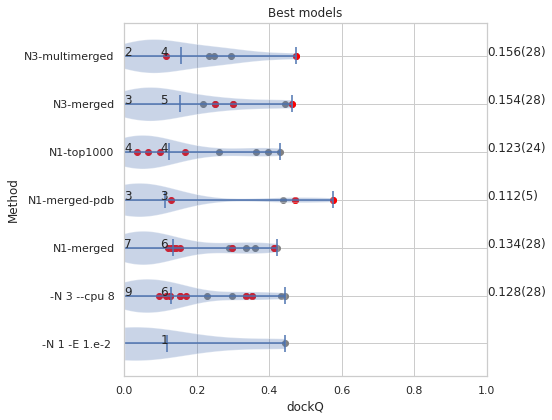

In [451]:
pdbset=['-N 3 --cpu 8', 
 'N1-top1000',
        'N1-merged','N1-merged-pdb','N3-merged',"N3-multimerged"]
cutoff=0.2
codes=goodmodels
# FInd best method for each model.
#codes=df_max.loc[df_max.params.isin(pdbset)]["CODE"].unique()
f, ax = plt.subplots(figsize=(6.5, 6.5))
#tempdf=newdf.loc[newdf.JHparams.isin(pdbset)]
tempdf=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))]
#best_df=newdf.sort_values("dockQ", ascending=False)
best_df=tempdf.sort_values('dockQ', ascending=False).drop_duplicates(['CODE']).reset_index()
best_df.sort_values("params")

#good_df=newdf.loc[(newdf.code.isin(codes))&(newdf.JHparams.isin(pdbset))].reset_index()
good_df=df_max.loc[df_max.CODE.isin(codes)&(df_max.params.isin(pdbset))&(df_max.dockQ>cutoff )].reset_index()

plt.scatter(good_df.dockQ,good_df.params,color="grey")
plt.scatter(best_df.dockQ,best_df.params,color="red")

#cc=np.corrcoef(newdf.dockQ,newdf.len)
#ax.legend()
ax.set_title("Best models")
ax.set_ylabel("Method")
ax.set_xlabel("dockQ")
ax.set(xlim=[0,1])
done={}
average={}
length={}
pos=[]
i=0
data=[]
for d in sorted(pdbset):
    done[d]=0
    average[d]=df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"].mean()
    length[d]=len(df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"])
    pos+=[i]
    data+=[df_max.loc[df_max.CODE.isin(codes)&(df_max.params==d)]["dockQ"]]
    i+=1
    print (d)
    
    
ax.violinplot(data,pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=False)    
for i, txt in enumerate(best_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.JHparams[i]))
    numhit=len(best_df.loc[best_df.params==best_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[best_df.params[i]]==0:
        done[best_df.params[i]]=1
        ax.annotate(str(numhit),(.0, best_df.params[i]))
        ax.annotate(str(round(average[best_df.params[i]],3))+"("+str(length[good_df.params[i]])+")"
                    ,(1.0, best_df.params[i]))
for d in datasets:
    done[d]=0
for i, txt in enumerate(good_df.name):
    #print (i,txt)
    sstr=txt[0:4]
    #ax.annotate(sstr, (newdf.dockQ[i], newdf.params[i]))
    numhit=len(good_df.loc[good_df.JHparams==good_df.params[i]])
    #print (numhit,newdf.params[i])
    if done[good_df.params[i]]==0:
        done[good_df.params[i]]=1
        ax.annotate(str(numhit),(.1, good_df.params[i]))
        #ax.annotate(str(round(average[good_df.JHparams[i]],3)),(1.0, good_df.JHparams[i]))
        #ax.annotate("("+str(length[good_df.JHparams[i]])+")",(1.2, good_df.JHparams[i]))


KeyError: '-N 5 --cpu 8'

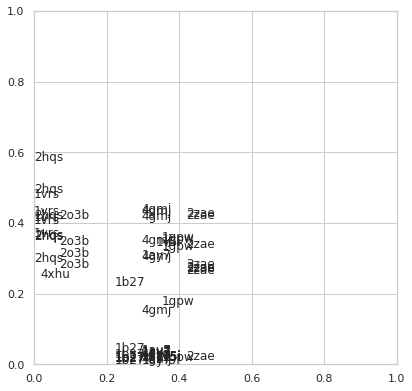

KeyError: '-N 5 --cpu 8'

In [412]:
cutoff=0.2
f, ax = plt.subplots(figsize=(6.5, 6.5))
for d in JHsets:
  
    #if d!="N1-merged":continue   
    #print (d)
    df_merged = pd.merge(data_first[datasets[0]],data_first[d], on=['code'],how="inner")
    #print (df_merged)
    #newdf=df_merged["dockQ_x","dockQ_y"]  #.loc[(df_merged.dockQ_x>cutoff or df_merged.dockQ_y>cutoff) ]
    #plt.scatter(df_merged.dockQ_x,df_merged.dockQ_y,label=d)
    for i, txt in enumerate(df_merged.name_x):
        #print (i,txt)
        try: 
            sstr=txt[0:4]
        except:
            sstr=df_merged.name_y[i][0:4]
        if (df_merged.dockQ_x[i]> cutoff or df_merged.dockQ_y[i]>cutoff):
            ax.annotate(sstr, (df_merged.dockQ_x[i], df_merged.dockQ_y[i]))
#x=[0,0.3]
#y=[0,0.3]
#plt.plot(x,y)
ax.legend()
ax.set_title("DockQ scores (first ranked)  ")
ax.set_xlabel("dockQ "+str(datasets[0]))
ax.set_ylabel("dockQ")

#cat.add_categories([1])
#df_merged.fillna(0, inplace =True)

In [413]:
goodmodels

array(['1gpw', '1vrs', '2hqs', '2nxn', '2o3b', '2zae', '3a8i', '3fpu',
       '4bmp', '4c6t', '4gmj', '4txo', '1ay7', '1b27', '1gcq', '1v5i',
       '2d5r', '2wbw', '2x9a', '3a1p', '3f1p', '4xs0', '4pw9', '4xhu',
       '4xkl', '2nqd', '2ejf', '4etw'], dtype=object)

In [414]:
JHsets

['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ',
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [415]:
JHsets1=['-N 3 --cpu 8',
 '-N 1 -E 1.e-100 --cpu 8',
 '-N 1 -E 1.e-2 ',
 'N1-merged-pdb',
 'N1-merged',
 '-N 1 -E 1.e-10 --cpu 8 ']

In [416]:
JHsets2=[
 'N1-top1000-merged',
 'N1-top1000',
 'N1-top100',
 'N1-top2000',
 'N1-top500',
 '-N 5 --cpu 8']

In [417]:
JHsets=['-N 3 --cpu 8',
 '-N 1 -E 1.e-2 --cpu 8',
 '-N 1 -E 1.e-10 --cpu 8 ',
 '-N 5 --cpu 8']
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()


In [418]:
train_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
test_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()

In [419]:
good_df=df_first.loc[(df_first.code.isin(goodmodels)&(df_first.JHparams.isin(JHsets)))].reset_index()

In [420]:
good_df=df_first.loc[(df_first.JHparams.isin(JHsets))].reset_index()

In [421]:
good_df

index                 name                 JHparams lenA lenB   msa  \
0        0  1ay7_u1_A-1ay7_u2_A             -N 3 --cpu 8   97   90  1060   
1        2  1b27_u1_A-1b27_u2_A             -N 3 --cpu 8  109   90   733   
2        4  1bdj_u1_A-1bdj_u2_A             -N 3 --cpu 8  129  118  5651   
3        6  1buh_u1_A-1buh_u2_A             -N 3 --cpu 8  291   72  1177   
4        8  1bvn_u1_A-1bvn_u2_A             -N 3 --cpu 8  496   75    95   
..     ...                  ...                      ...  ...  ...   ...   
431   3813  4zfr_u1_A-4zfr_u2_A  -N 1 -E 1.e-10 --cpu 8   186   77   959   
432   3815  5brr_u1_A-5brr_u2_A  -N 1 -E 1.e-10 --cpu 8   378  266   448   
433   3817  5cec_u1_A-5cec_u2_A  -N 1 -E 1.e-10 --cpu 8   403  191     8   
434   3819  5cra_u1_A-5cra_u2_A  -N 1 -E 1.e-10 --cpu 8   193   77     1   
435   3821  5eg3_u1_A-5eg3_u2_A  -N 1 -E 1.e-10 --cpu 8   303  105   305   

       msaA   msaB cdhit  dockQ  ...  CODE                   params      tmAB  \
0      1485   2034  1026  0.298  ...  1ay7             -N 3 --cpu 8  0.828190   
1      1484   2034   654  0.223  ...  1b27             -N 3 --cpu 8  0.824750   
2    349880  23051  5071      0  ...  1bdj             -N 3 --cpu 8  0.861435   
3    555226   1820   548      0  ...  1buh             -N 3 --cpu 8  0.560760   
4     52623    123    85  0.006  ...  1bvn             -N 3 --cpu 8  0.619740   
..      ...    ...   ...    ...  ...   ...                      ...       ...   
431    1619  17771   371  0.002  ...  4zfr  -N 1 -E 1.e-10 --cpu 8   0.756565   
432   10219  28413   346  0.008  ...  5brr  -N 1 -E 1.e-10 --cpu 8   0.701015   
433     200  59695     7  0.018  ...  5cec  -N 1 -E 1.e-10 --cpu 8   0.487430   
434      11  17793     1  0.011  ...  5cra  -N 1 -E 1.e-10 --cpu 8   0.479460   
435  147816   3955   105  0.016  ...  5eg3  -N 1 -E 1.e-10 --cpu 8   0.580155   

        msaAB tmAB_max msaAB_max tmAB_min msaAB_min numcorrect  len  
0      1759.5  0.84625    2034.0  0.81013    1485.0     53.985  187  
1      1759.0  0.85428    2034.0  0.79522    1484.0     49.025  199  
2    186465.5  0.92240  349880.0  0.80047   23051.0          0  247  
3    278523.0  0.73259  555226.0  0.38893    1820.0          0  363  
4     26373.0  0.70905   52623.0  0.53043     123.0          0  571  
..        ...      ...       ...      ...       ...        ...  ...  
431    9695.0  0.76976   17771.0  0.74337    1619.0          0  263  
432   19316.0  0.70288   28413.0  0.69915   10219.0         76  644  
433   29947.5  0.68790   59695.0  0.28696     200.0          0  594  
434    8902.0  0.63936   17793.0  0.31956      11.0          0  270  
435   75885.5  0.63151  147816.0  0.52880    3955.0          0  408  

[436 rows x 54 columns]

In [422]:
cutoff

0.2

AttributeError: 'float' object has no attribute 'shape'

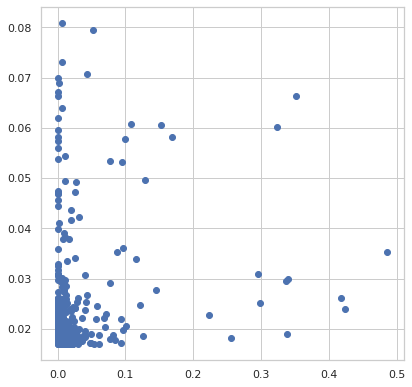

AttributeError: 'float' object has no attribute 'shape'

In [423]:
ydata=good_df.dockQ
cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]

#xdata=good_df[["lenA","lenB","long","med"]]
#cols=["longA","longB","medA","medB","tmA","tmB"]
cols=["med","long","msa"]
#cols=["msa"]
xdata=good_df[cols]


reg.fit(xdata,ydata)
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")
(i,j,dockq,mm)=get_ranks(good_df,ypred)
#print(i,j,k/i)
ax.set_title("CC" + " " + str(round(cc[0,1],3))
            + " Good: " + str(round(j/i,3)) + " Loss: " + str(round(dockq/i,3))
             + " , " + str(round(mm/i,3))
             + " Test: " + str(i)
            )


In [424]:
print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

Intercept: 
 0.016953832818100246
Coefficients: 
 [-1.03986661e-04  2.62920854e-05  6.51637782e-06]


In [425]:

for s in JHsets:
    set_df=good_df.loc[good_df.params==s]
    ypred=set_df["dockQ"].to_list()
    (i,j,dockq,mm)=get_ranks(set_df,ypred)
    print (s,i,j,dockq,mm)

-N 3 --cpu 8 6 6 0.0 0.0
-N 1 -E 1.e-2 --cpu 8 0 0 0 0


-N 1 -E 1.e-10 --cpu 8  6 6 0.0 0.0
-N 5 --cpu 8 0 0 0 0


AttributeError: 'float' object has no attribute 'shape'

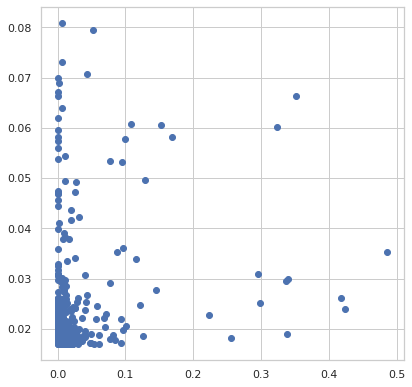

AttributeError: 'float' object has no attribute 'shape'

In [426]:
xdata=good_df[cols]
ydata=good_df.dockQ

ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [427]:
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()
good_df

index                 name                 JHparams lenA lenB   msa  \
0       0  1ay7_u1_A-1ay7_u2_A             -N 3 --cpu 8   97   90  1060   
1       2  1b27_u1_A-1b27_u2_A             -N 3 --cpu 8  109   90   733   
2      30  1gcq_u1_A-1gcq_u2_A             -N 3 --cpu 8   66   57  1365   
3      34  1gpw_u1_A-1gpw_u2_A             -N 3 --cpu 8  252  204  7137   
4      86  1v5i_u1_A-1v5i_u2_A             -N 3 --cpu 8  276   78  1922   
5      90  1vrs_u1_A-1vrs_u2_A             -N 3 --cpu 8  124  117  2091   
6     140  2d5r_u1_A-2d5r_u2_A             -N 3 --cpu 8  265  121   521   
7     142  2ejf_u1_A-2ejf_u2_A             -N 3 --cpu 8  235   71  7710   
8     152  2hqs_u1_A-2hqs_u2_A             -N 3 --cpu 8  398  109  2460   
9     162  2nqd_u1_A-2nqd_u2_A             -N 3 --cpu 8  221  111   266   
10    164  2nxn_u1_A-2nxn_u2_A             -N 3 --cpu 8  255  148  5463   
11    170  2o3b_u1_A-2o3b_u2_A             -N 3 --cpu 8  240  144   456   
12    188  2wbw_u1_A-2wbw_u2_A             -N 3 --cpu 8  186  125     6   
13    194  2x9a_u1_A-2x9a_u2_A             -N 3 --cpu 8  103   63     4   
14    200  2zae_u1_A-2zae_u2_A             -N 3 --cpu 8  107   93  1125   
15    202  3a1p_u1_A-3a1p_u2_A             -N 3 --cpu 8  163   74  6614   
16    204  3a8i_u1_A-3a8i_u2_A             -N 3 --cpu 8  352  129  6679   
17    230  3f1p_u1_A-3f1p_u2_A             -N 3 --cpu 8  120  115  6781   
18    238  3fpu_u1_A-3fpu_u2_A             -N 3 --cpu 8   89   70     1   
19    308  4bmp_u1_A-4bmp_u2_A             -N 3 --cpu 8  301  118  4607   
20    316  4c6t_u1_A-4c6t_u2_A             -N 3 --cpu 8  163  143   173   
21    326  4etw_u1_A-4etw_u2_A             -N 3 --cpu 8  252   78  7563   
22    334  4gmj_u1_A-4gmj_u2_A             -N 3 --cpu 8  253  236  1189   
23    390  4pw9_u1_A-4pw9_u2_A             -N 3 --cpu 8  366   87  2897   
24    400  4txo_u1_A-4txo_u2_A             -N 3 --cpu 8  178  158  7106   
25    410  4xhu_u1_A-4xhu_u2_A             -N 3 --cpu 8  352   95   410   
26    412  4xkl_u1_A-4xkl_u2_A             -N 3 --cpu 8   76   34  1262   
27    416  4xs0_u1_A-4xs0_u2_A             -N 3 --cpu 8  147  141  3395   
28   3387  1ay7_u1_A-1ay7_u2_A  -N 1 -E 1.e-10 --cpu 8    97   90     2   
29   3389  1b27_u1_A-1b27_u2_A  -N 1 -E 1.e-10 --cpu 8   109   90    35   
30   3417  1gcq_u1_A-1gcq_u2_A  -N 1 -E 1.e-10 --cpu 8    66   57   178   
31   3421  1gpw_u1_A-1gpw_u2_A  -N 1 -E 1.e-10 --cpu 8   252  204  5974   
32   3473  1v5i_u1_A-1v5i_u2_A  -N 1 -E 1.e-10 --cpu 8   276   78     1   
33   3477  1vrs_u1_A-1vrs_u2_A  -N 1 -E 1.e-10 --cpu 8   124  117   836   
34   3527  2d5r_u1_A-2d5r_u2_A  -N 1 -E 1.e-10 --cpu 8   265  121   338   
35   3529  2ejf_u1_A-2ejf_u2_A  -N 1 -E 1.e-10 --cpu 8   235   71  1220   
36   3539  2hqs_u1_A-2hqs_u2_A  -N 1 -E 1.e-10 --cpu 8   398  109  2368   
37   3549  2nqd_u1_A-2nqd_u2_A  -N 1 -E 1.e-10 --cpu 8   221  111    13   
38   3551  2nxn_u1_A-2nxn_u2_A  -N 1 -E 1.e-10 --cpu 8   255  148  4791   
39   3557  2o3b_u1_A-2o3b_u2_A  -N 1 -E 1.e-10 --cpu 8   240  144    76   
40   3575  2wbw_u1_A-2wbw_u2_A  -N 1 -E 1.e-10 --cpu 8   186  125     1   
41   3581  2x9a_u1_A-2x9a_u2_A  -N 1 -E 1.e-10 --cpu 8   103   63     1   
42   3587  2zae_u1_A-2zae_u2_A  -N 1 -E 1.e-10 --cpu 8   107   93    53   
43   3589  3a1p_u1_A-3a1p_u2_A  -N 1 -E 1.e-10 --cpu 8   163   74   357   
44   3591  3a8i_u1_A-3a8i_u2_A  -N 1 -E 1.e-10 --cpu 8   352  129  6208   
45   3617  3f1p_u1_A-3f1p_u2_A  -N 1 -E 1.e-10 --cpu 8   120  115   361   
46   3625  3fpu_u1_A-3fpu_u2_A  -N 1 -E 1.e-10 --cpu 8    89   70     1   
47   3695  4bmp_u1_A-4bmp_u2_A  -N 1 -E 1.e-10 --cpu 8   301  118   983   
48   3703  4c6t_u1_A-4c6t_u2_A  -N 1 -E 1.e-10 --cpu 8   163  143    10   
49   3713  4etw_u1_A-4etw_u2_A  -N 1 -E 1.e-10 --cpu 8   252   78   827   
50   3721  4gmj_u1_A-4gmj_u2_A  -N 1 -E 1.e-10 --cpu 8   253  236   889   
51   3777  4pw9_u1_A-4pw9_u2_A  -N 1 -E 1.e-10 --cpu 8   366   87    82   
52   3787  4txo_u1_A-4txo_u2_

In [428]:
# Now we try all combinations - no plots
set1_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets1))].reset_index()
set2_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets2))].reset_index()
good_df=df_first.loc[(df_first.code.isin(goodmodels))&(df_first.JHparams.isin(JHsets))].reset_index()

cols=["lenA","lenB","msa","long","med","longA","medA","longB","medB","tmA","tmB"]
ydata=good_df.dockQ

res={}
maxvalue=0
for c in cols:
    xdata=good_df[[c]]
    reg.fit(xdata,ydata)
    ypred = reg.predict(xdata)
    print (c,round(np.corrcoef(ydata,ypred)[0,1],3))
    res[c]=np.corrcoef(ydata,ypred)[0,1]
    maxvalue=max(res[c],maxvalue)    
for c in cols:
    for d in cols:
        xdata=good_df[[c,d]]
        reg.fit(xdata,ydata)
        ypred = reg.predict(xdata)
        #print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        res[c+d]=np.corrcoef(ydata,ypred)[0,1]
        #if (res[c+d]-maxvalue>0.0):
        #    print (c,d,round(np.corrcoef(ydata,ypred)[0,1],3))
        (i,j,k,l)=get_ranks(good_df,ypred)
        print (c,d,i,j,k,l)

AttributeError: 'float' object has no attribute 'shape'

In [429]:

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 0.10494620169466623
Coefficients: 
 [3.81145758e-05]


Text(0, 0.5, 'predicted dockQ')

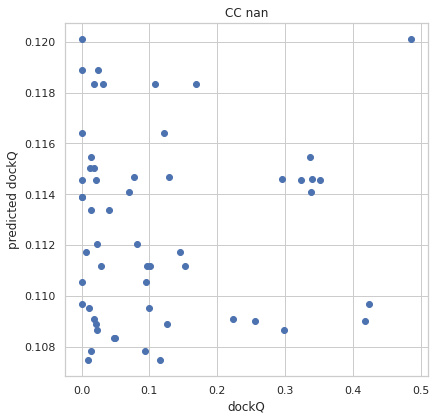

In [430]:
ypred = reg.predict(xdata)
f, ax = plt.subplots(figsize=(6.5, 6.5))
plt.scatter(ydata,ypred)
#cc=np.corrcoef(ydata,ypred)
ax.set_title("CC" + " " + str(cc[0,1]))
ax.set_xlabel("dockQ")
ax.set_ylabel("predicted dockQ")


In [431]:
newdf=df.loc[df.JHparams=="trRosetta"]
plt.scatter(newdf.csv,newdf.)

SyntaxError: invalid syntax (<ipython-input-431-1bbe5c8e123e>, line 2)

In [432]:
newdf[["CODE","dockQ","csv","tmAB","long"]].sort_values("csv")

KeyError: "['csv'] not in index"

In [433]:
JHsets=['-N 3 --cpu 8', 
       '-N 1 -E 1.e-100 --cpu 8', '-N 1 -E 1.e-2 ', 'N1-merged-pdb',
       'N1-merged', '-N 1 -E 1.e-10 --cpu 8 ', 'N1-top1000-merged',
       'N1-top1000', 'N1-top100', 'N1-top2000', 'N1-top500',  '-N 5 --cpu 8']


Text(0.5, 0, 'cdhit')

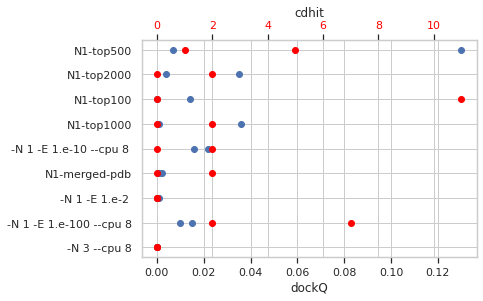

In [434]:
newdf=df.loc[(df.CODE=="4etw")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

Text(0.5, 0, 'cdhit')

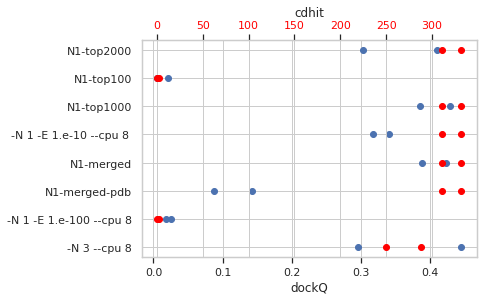

In [435]:
newdf=df.loc[(df.CODE=="4gmj")&(df.JHparams.isin(JHsets))].reset_index()
fig, ax1 = plt.subplots()
ax1.set_xlabel('dockQ')
ax1.scatter(newdf.dockQ,newdf.JHparams)
ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis
ax2.scatter(newdf.long,newdf.JHparams,color="red")
ax2.tick_params(axis='x', labelcolor="red")
ax2.set_xlabel('cdhit')

# bes models to test 2zae 4gmj
# Bad model 4etw

In [436]:
df_max.loc[(df_max.params=="trRosetta") & (df_max.dockQ==0)]

name  lenA  lenB     msa      msaA      msaB  \
JHparams  code                                                                
trRosetta 3fap  3fap_u2_A-3fap_u1_A   108   108  1208.0   35608.0   34346.0   
          3l1z  3l1z_u2_A-3l1z_u1_A   153   153  1390.0   48813.0   77169.0   
          3rj3  3rj3_u2_A-3rj3_u1_A   295   295   354.0   54903.0   55142.0   
          4emj  4emj_u2_A-4emj_u1_A   403   403  6281.0  227257.0  213507.0   

                 cdhit  dockQ  fnat     iRMS  ...  CODE     params      tmAB  \
JHparams  code                                ...                              
trRosetta 3fap   573.0    0.0   0.0  187.525  ...  3fap  trRosetta  0.840125   
          3l1z   810.0    0.0   0.0  261.906  ...  3l1z  trRosetta  0.776680   
          3rj3   244.0    0.0   0.0  515.213  ...  3rj3  trRosetta  0.635370   
          4emj  5675.0    0.0   0.0  681.898  ...  4emj  trRosetta  0.884110   

                   msaAB  tmAB_max  msaAB_max  tmAB_min  msaAB_min  \
JHparams  code                                                       
trRosetta 3fap   18548.5   0.87845    35608.0   0.80207     1489.0   
          3l1z   57516.5   0.83090    77169.0   0.72778    37864.0   
          3rj3   32649.5   0.80210    55142.0   0.48427    10157.0   
          4emj  131593.0   0.90552   227257.0   0.86736    35929.0   

                numcorrect  len  
JHparams  code                   
trRosetta 3fap         0.0  201  
          3l1z         0.0  239  
          3rj3         0.0  421  
          4emj         0.0  509  

[4 rows x 51 columns]